# **Business Understanding**
Company R adalah Agen penempatan kerja yang menyediakan program pelatihan data science gratis ke berbagai industri company client di seluruh Indonesia. Adapun persyaratan yang diberlakukan adalah sebagai berikut :
- Terbatas untuk 100 pelamar.
- Diselenggarakan secara triwulanan (dimulai pada minggu pertama bulan Januari, April, Juli, Okt).
- Durasi pelatihan 3 bulan. <br>
- Agensi menawarkan kontrak penempatan kerja selama satu tahun.
- Company R mendapatkan keuntungan sebesar 0,25% dari gaji bulanan.
- Pekerjaan akan berakhir setelah periode satu tahun selesai, kecuali jika ditawarkan kontrak/perpanjangan baru.
## **`Problem`**
Bagaimana cara meningkatkan keuntungan yang diperoleh dari penempatan kerja tidak maksimal.
## **`Goals`**
Membantu Company R dalam meningkatkan keuntungan yang diperoleh dari program penempatan kerja dan memastikan biaya digunakan untuk keuntungan yang lebih besar.
## **`Objective`**
Membangun model Machine Learning yang dapat membantu mengidentifikasi apakah kandidat yang mendaftar pelatihan  sedang mencari perubahan pekerjaan atau tidak berdasarkan dari data baru yang diberikan. <br>
Kemampuan untuk menyaring kandidat yang mendaftar pelatihan untuk mencari perubahan pekerjaan dengan cara yang lebih tepat. <br>
Porsi yang lebih besar dari peserta pelatihan yang mencari perubahan pekerjaan = Lebih banyak kandidat untuk program penempatan kerja.
## **`Business Metrics`**
Revenue (pendapatan) dari program penempatan kerja.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/FitAndraini/portfolio-data-science/main/hr-analytics.csv")
df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

# Explore data 

Kita memiliki 19158 data yang akan digunakan yang masing - masing memiliki 14 kolom. Kolom - kolom tersebut memiliki arti :
1. **enrollee_id** : ID unik kandidat
2. **city**: kota
3. **city_development _index**: Indeks perkembangan kota (berskala)
4. **gender**: Jenis kelamin kandidat
5. **relevent_experience** : Pengalaman kandidat yang relevan
6. **enrolled_university** : Jenis program Universitas yang didaftarkan jika ada
7. **education_level**: Tingkat pendidikan kandidat
8. **major_discipline** : Disiplin ilmu kandidat / jurusan
9. **experience** : Pengalaman kandidat dalam beberapa tahun
10. **company_size**: Jumlah karyawan pada perusahaan pemberi kerja
11. **company_type** : Jenis perusahaan pemberi kerja
12. **last_new_job**: Selisih tahun antara pekerjaan sebelumnya dan pekerjaan saat ini
13. **training_hours**: lama waktu pelatihan selesai
14. **target**: 0 – Tidak mencari perubahan pekerjaan (not looking for job), 1 – Mencari perubahan pekerjaan (looking for job)


# **STAGE 1: Exploratory Data Analysis**

# **Descriptive Statistics**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
# Melihat jumlah data
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom enrollee_id:
8949     1
10660    1
30726    1
18507    1
31273    1
        ..
11547    1
32067    1
14356    1
18051    1
23834    1
Name: enrollee_id, Length: 19158, dtype: int64

Value count kolom city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Value count kolom city_development_index:
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

Value count kolom gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollme

Kita dapat melihat bahwa:
- Dataframe memiliki total 19158 baris dan 14 kolom
- Dataframe masih memiliki beberapa null values di beberapa kolom seperti : `gender`, `enrolled_university`, `education_level `, `major_discipline`, `experience`, `company_size`, `company_type`, `last_new_job`
- Target klasifikasinya akan ada di kolom `target` dengan tipe data float64.
- sisanya adalah feature yang sifatnya adalah numerik dan object dalam bentuk tipe data int64, float64
- Kolom `enrollee_id` seharusnya ber tipe data object.
- Kolom `target` seharusnya ber tipe data int64. 
- Untuk mengetahui kualifikasi dari tiap kandidat berdasarkan berapa tahun pengalaman di dunia kerja, perlu dibuat kolom baru `experience_level` berdasarkan beberapa level pengalaman, yang mana diambil dari kolom `experience`.
- Perlu dibuat kolom baru `graduate` berdasarkan kolom `education_level` untuk memisahkan tingkat pendidikan kandidat, yaitu : **yes** = ['Graduate', 'Masters', 'Phd'] <br>**no** = ['Primary School', 'High School'].
- Pada kolom `last_new_job` perlu dilakukan perubahan data, karena dapat dilihat data kurang sesuai, sehingga sulit untuk dibaca.
- Pada kolom `company_size` terdapat data kurang sesuai yaitu **10/49** dan **<10** sehingga perlu dilakukan perubahan data.
- Data target tidak balance sekitar **20-40%** sehingga perlu dilakukan handle imbalance dengan oversampling dan undersampling, kecuali jika datanya diatas **40%** sehingga tidak perlu dilakukan handle imbalance.

### Sampling untuk memahami data, menghindari invalid values

In [ ]:
df.sample(10)

enrollee_id      city  city_development_index  gender  \
11677        32687   city_42                   0.563     NaN   
18157         4473   city_21                   0.624    Male   
2947         27611  city_103                   0.920    Male   
2396         28153   city_46                   0.762    Male   
11995        20194  city_103                   0.920    Male   
18686        19804  city_102                   0.804    Male   
16869         7685  city_103                   0.920  Female   
13819        14703   city_21                   0.624     NaN   
16164         3644  city_131                   0.680     NaN   
14456        16483   city_21                   0.624     NaN   

           relevent_experience enrolled_university education_level  \
11677  Has relevent experience    Full time course             Phd   
18157  Has relevent experience       no_enrollment        Graduate   
2947   Has relevent experience       no_enrollment        Graduate   
2396   Has relevent experience       no_enrollment         Masters   
11995  Has relevent experience       no_enrollment        Graduate   
18686  Has relevent experience       no_enrollment         Masters   
16869  Has relevent experience       no_enrollment        Graduate   
13819  Has relevent experience       no_enrollment        Graduate   
16164   No relevent experience       no_enrollment         Masters   
14456   No relevent experience       no_enrollment        Graduate   

      major_discipline experience company_size    company_type last_new_job  \
11677             STEM         <1          NaN             NaN          NaN   
18157             STEM         15      500-999  Funded Startup            2   
2947        Humanities        >20      100-500         Pvt Ltd           >4   
2396              STEM        >20        50-99             NaN           >4   
11995             STEM          2      500-999         Pvt Ltd            1   
18686             STEM         10    5000-9999         Pvt Ltd            1   
16869             STEM        >20       10000+         Pvt Ltd            1   
13819             STEM          3       10000+         Pvt Ltd            3   
16164             STEM          3          NaN         Pvt Ltd        never   
14456             STEM          1       10000+         Pvt Ltd          NaN   

       training_hours  target  
11677              43     1.0  
18157              75     1.0  
2947               22     0.0  
2396               13     0.0  
11995              72     0.0  
18686              23     0.0  
16869              98     0.0  
13819              57     1.0  
16164              51     1.0  
14456              36     0.0

# **Statistical Summary**

In [ ]:
nums = ['city_development_index', 'training_hours'] #target excluded for visulization
cats = ['city','gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

In [ ]:
df[nums].describe().T

count       mean        std    min    25%     50%  \
city_development_index  19158.0   0.828848   0.123362  0.448   0.74   0.903   
training_hours          19158.0  65.366896  60.058462  1.000  23.00  47.000   

                          75%      max  
city_development_index   0.92    0.949  
training_hours          88.00  336.000

### Pendekatan Numeric
- Nilai yang tertera pada setiap kolom masuk akal.
- Nilai max/min untuk kolom city_development_index sudah dibatas wajar yakni dari 0.448 - 0.949. Hanya saja, nilai max/min untuk kolom training_hours memiliki selisih yang cukup jauh yakni 1 - 336 hours.
- Selisih mean dan median: `city_development_index` = 0.07 (signifikan),`training_hours` = 65.36 - 47.00 = 18.36 terindikasi **positively skewed** karena mean > median.

In [ ]:
df[cats].describe().T

count unique                      top   freq
city                 19158    123                 city_103   4355
gender               14650      3                     Male  13221
relevent_experience  19158      2  Has relevent experience  13792
enrolled_university  18772      3            no_enrollment  13817
education_level      18698      5                 Graduate  11598
major_discipline     16345      6                     STEM  14492
experience           19093     22                      >20   3286
company_size         13220      8                    50-99   3083
company_type         13018      6                  Pvt Ltd   9817
last_new_job         18735      6                        1   8040


### Pendekatan Categorikal
  - Jumlah unique values sudah masuk akal untuk setiap kolom.
  - Hanya saja, unique values kolom `experience` ada 22. Jika data memiliki lebih dari 10 kategori, ini bisa menjadi masalah dalam proses analisis data, terutama jika kategori tersebut tidak terdistribusi secara merata. Mungkin akan lebih baik dibuat menjadi range 0, 1-5, 6-15, 16-20, 21.

# **Univariate Analysis**

Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada kolom Numeric dengan *Univariate Analysis* untuk melihat distribusinya.

### Boxplot 

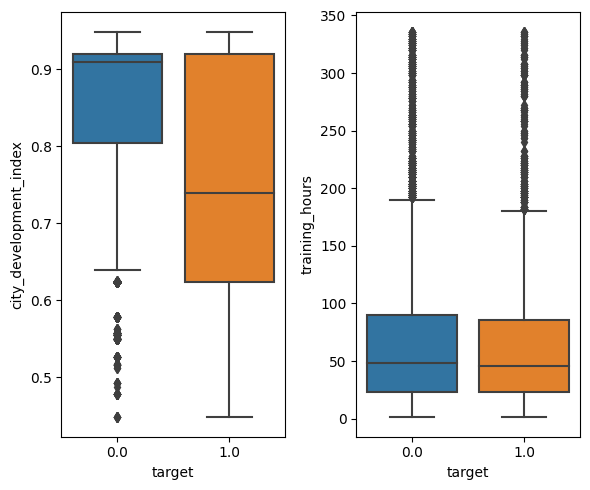

In [ ]:
plt.figure(figsize=(6,5))
for i in range(0, len(nums)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[nums[i]], orient='v', x = df['target'])
    plt.tight_layout()

### Violin Plots

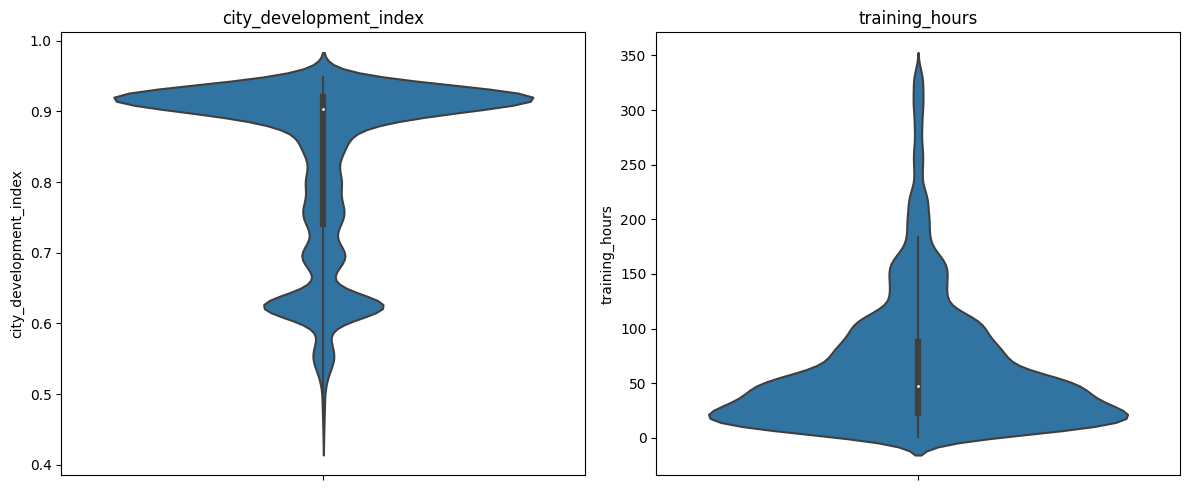

In [ ]:
fig, axs = plt.subplots(1, len(nums), figsize=(12, 5), squeeze=False)
for i, nums in enumerate(nums):
    sns.violinplot(y=df[nums], ax=axs[0][i], hue=df['target'])
    axs[0][i].set_title(nums)
    
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas :
- Outlier terdapat pada kolom `city_development_index` target 0 dan `training_hours`. Semua data yang  memiliki outlier adalah positively skewed.
- `city_development_index`:
  - Distribusi data city_development_index pada target 0 lebih kecil dibandingkan dengan target 1.
  - Median `city_development_index` berada diatas 0.9, yang artinya kebanyakan kandidat yang tidak sedang mencari perubahan pekerjaan (target 0) berasal dari kota yang memiliki nilai `city_development_index` yang tinggi (kot-kota maju). Sedangkan, kandidat yang sedang mencari perubahan pekerjaan (target 1) berasal dari kota dengan nilai `city_development_index` yang lebih rendah (median = 0.73).
  - Outliers hanya terdapat pada data kandidat yang tidak sedang mencari perubahan  (target 0), dimana outliers berada dibawah nilai 0.64. Artinya, meskipun banyak dari mereka yang berasal dari kota besar, terdapat beberapa kandidat dari kota kecil yang juga tidak ingin mencari perubahan pekerjaan.

- `training_hours`:
  - Distribusi data pada kolom `training_hours` antara kandidat yang sedang mencari perubahan pekerjaan (target 1) dan yang tidak hampir sama. Kebanyakan kandidat menyelesaikan training dalam waktu kurang lebih 50 jam.
  - Pada umumnya, kandidat dapat menyelesaikan training dalam waktu 1 sampai 180 jam. Tapi ada beberapa persen orang yang tidak cukup mampu menyelesaikan training dalam jangka waktu tersebut (outlier), baik dalam kategori kandidat yang sedang mencari perubahan pekerjaan (target 1) atau yang tidak.
  - **Rekomendasi untuk tim bisnis**: Lebih fokus pada kandidat dengan training hours diatas 180, karena semakin lama waktu training yang dibutuhkan, akan memerlukan cost yang lebih besar.


### Histplot

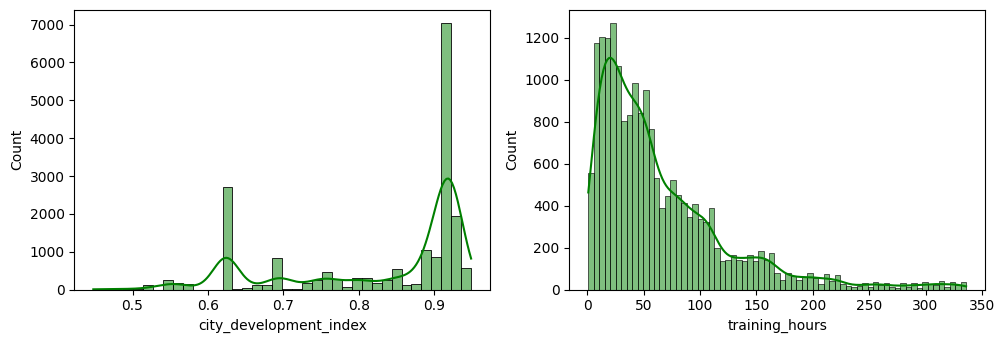

In [ ]:
nums = ['city_development_index', 'training_hours']

plt.figure(figsize=(15, 20))
for i in range(0, len(nums)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True)
    plt.tight_layout()

Berdasarkan visualisasi Hist Plots diatas : <br>
- `city_development_index` berbentuk **Bimodal**. <br>
  - Lonjakan terbesar berada di sekitar nilai indeks 0.9. Ini artinya kebanyakan kandidat yang mengikuti training adalah kandidat yang berasal dari kota-kota besar. <br>
  - Namun, juga terdapat lonjakan di sekitar nilai indeks 0.62, yang menunjukkan bahwa jumlah kandidat dari kota yang tidak tergolong kota besar juga cukup banyak, walau tidak sebanyak kandidat yang berasal dari kota besar.
- `training_hours` berbentuk **positively skewed**
 - Kebanyakan kandidat dapat menyelesaikan training dalam waktu 1-180 jam.
  - Tapi, terdapat data outliers, dimana data-data tersebut bernilai jauh lebih tinggi daripada data-data lainnya (dapat dilihat dari adanya pencilan pada kanan grafik).

### Countplot (categorical)

In [ ]:
def percentages(col):
  x = df.groupby([col, 'target'])[['city']].count().reset_index()
  x.columns = [col, 'target', 'count']
  x['total'] = x.groupby([col])[['count']].transform('sum')
  x['percentage'] = x['count'] / x['total'] * 100
  x.sort_values(['percentage'], ascending = False, inplace = True)
  x = x[x.target == 1]
  display(x)

In [ ]:
for i in [i for i in cats if i not in (['city'])]:
  percentages(i)

gender  target  count  total  percentage
1  Female     1.0    326   1238   26.332795
5   Other     1.0     50    191   26.178010
3    Male     1.0   3012  13221   22.781938

relevent_experience  target  count  total  percentage
3   No relevent experience     1.0   1816   5366   33.842713
1  Has relevent experience     1.0   2961  13792   21.468968

enrolled_university  target  count  total  percentage
1    Full time course     1.0   1431   3757   38.088901
3    Part time course     1.0    302   1198   25.208681
5       no_enrollment     1.0   2921  13817   21.140624

education_level  target  count  total  percentage
1        Graduate     1.0   3245  11598   27.978962
5         Masters     1.0    935   4361   21.440037
3     High School     1.0    394   2017   19.533961
7             Phd     1.0     58    414   14.009662
9  Primary School     1.0     41    308   13.311688

major_discipline  target  count  total  percentage
9             Other     1.0    102    381   26.771654
3   Business Degree     1.0     86    327   26.299694
11             STEM     1.0   3791  14492   26.159260
7          No Major     1.0     55    223   24.663677
5        Humanities     1.0    141    669   21.076233
1              Arts     1.0     53    253   20.948617

experience  target  count  total  percentage
41         <1     1.0    237    522   45.402299
1           1     1.0    233    549   42.440801
27          3     1.0    478   1354   35.302806
23          2     1.0    374   1127   33.185448
29          4     1.0    457   1403   32.573058
35          7     1.0    303   1028   29.474708
31          5     1.0    412   1430   28.811189
33          6     1.0    343   1216   28.207237
37          8     1.0    195    802   24.314214
5          11     1.0    151    664   22.740964
25         20     1.0     33    148   22.297297
39          9     1.0    213    980   21.734694
3          10     1.0    207    985   21.015228
9          13     1.0     77    399   19.298246
7          12     1.0     92    494   18.623482
11         14     1.0    107    586   18.259386
21         19     1.0     53    304   17.434211
17         17     1.0     57    342   16.666667
13         15     1.0    114    686   16.618076
19         18     1.0     43    280   15.357143
43        >20     1.0    503   3286   15.307365
15         16     1.0     72    508   14.173228

company_size  target  count  total  percentage
1         10/49     1.0    344   1471   23.385452
7        10000+     1.0    385   2019   19.068846
13    5000-9999     1.0    102    563   18.117229
9         50-99     1.0    545   3083   17.677587
11      500-999     1.0    152    877   17.331813
15          <10     1.0    224   1308   17.125382
3       100-500     1.0    415   2571   16.141579
5     1000-4999     1.0    200   1328   15.060241

company_type  target  count  total  percentage
7                 Other     1.0     29    121   23.966942
1   Early Stage Startup     1.0    142    603   23.548922
9         Public Sector     1.0    210    955   21.989529
5                   NGO     1.0     97    521   18.618042
11              Pvt Ltd     1.0   1775   9817   18.080880
3        Funded Startup     1.0    140   1001   13.986014

last_new_job  target  count  total  percentage
11        never     1.0    739   2452   30.138662
1             1     1.0   2125   8040   26.430348
3             2     1.0    700   2900   24.137931
5             3     1.0    231   1024   22.558594
7             4     1.0    228   1029   22.157434
9            >4     1.0    600   3290   18.237082

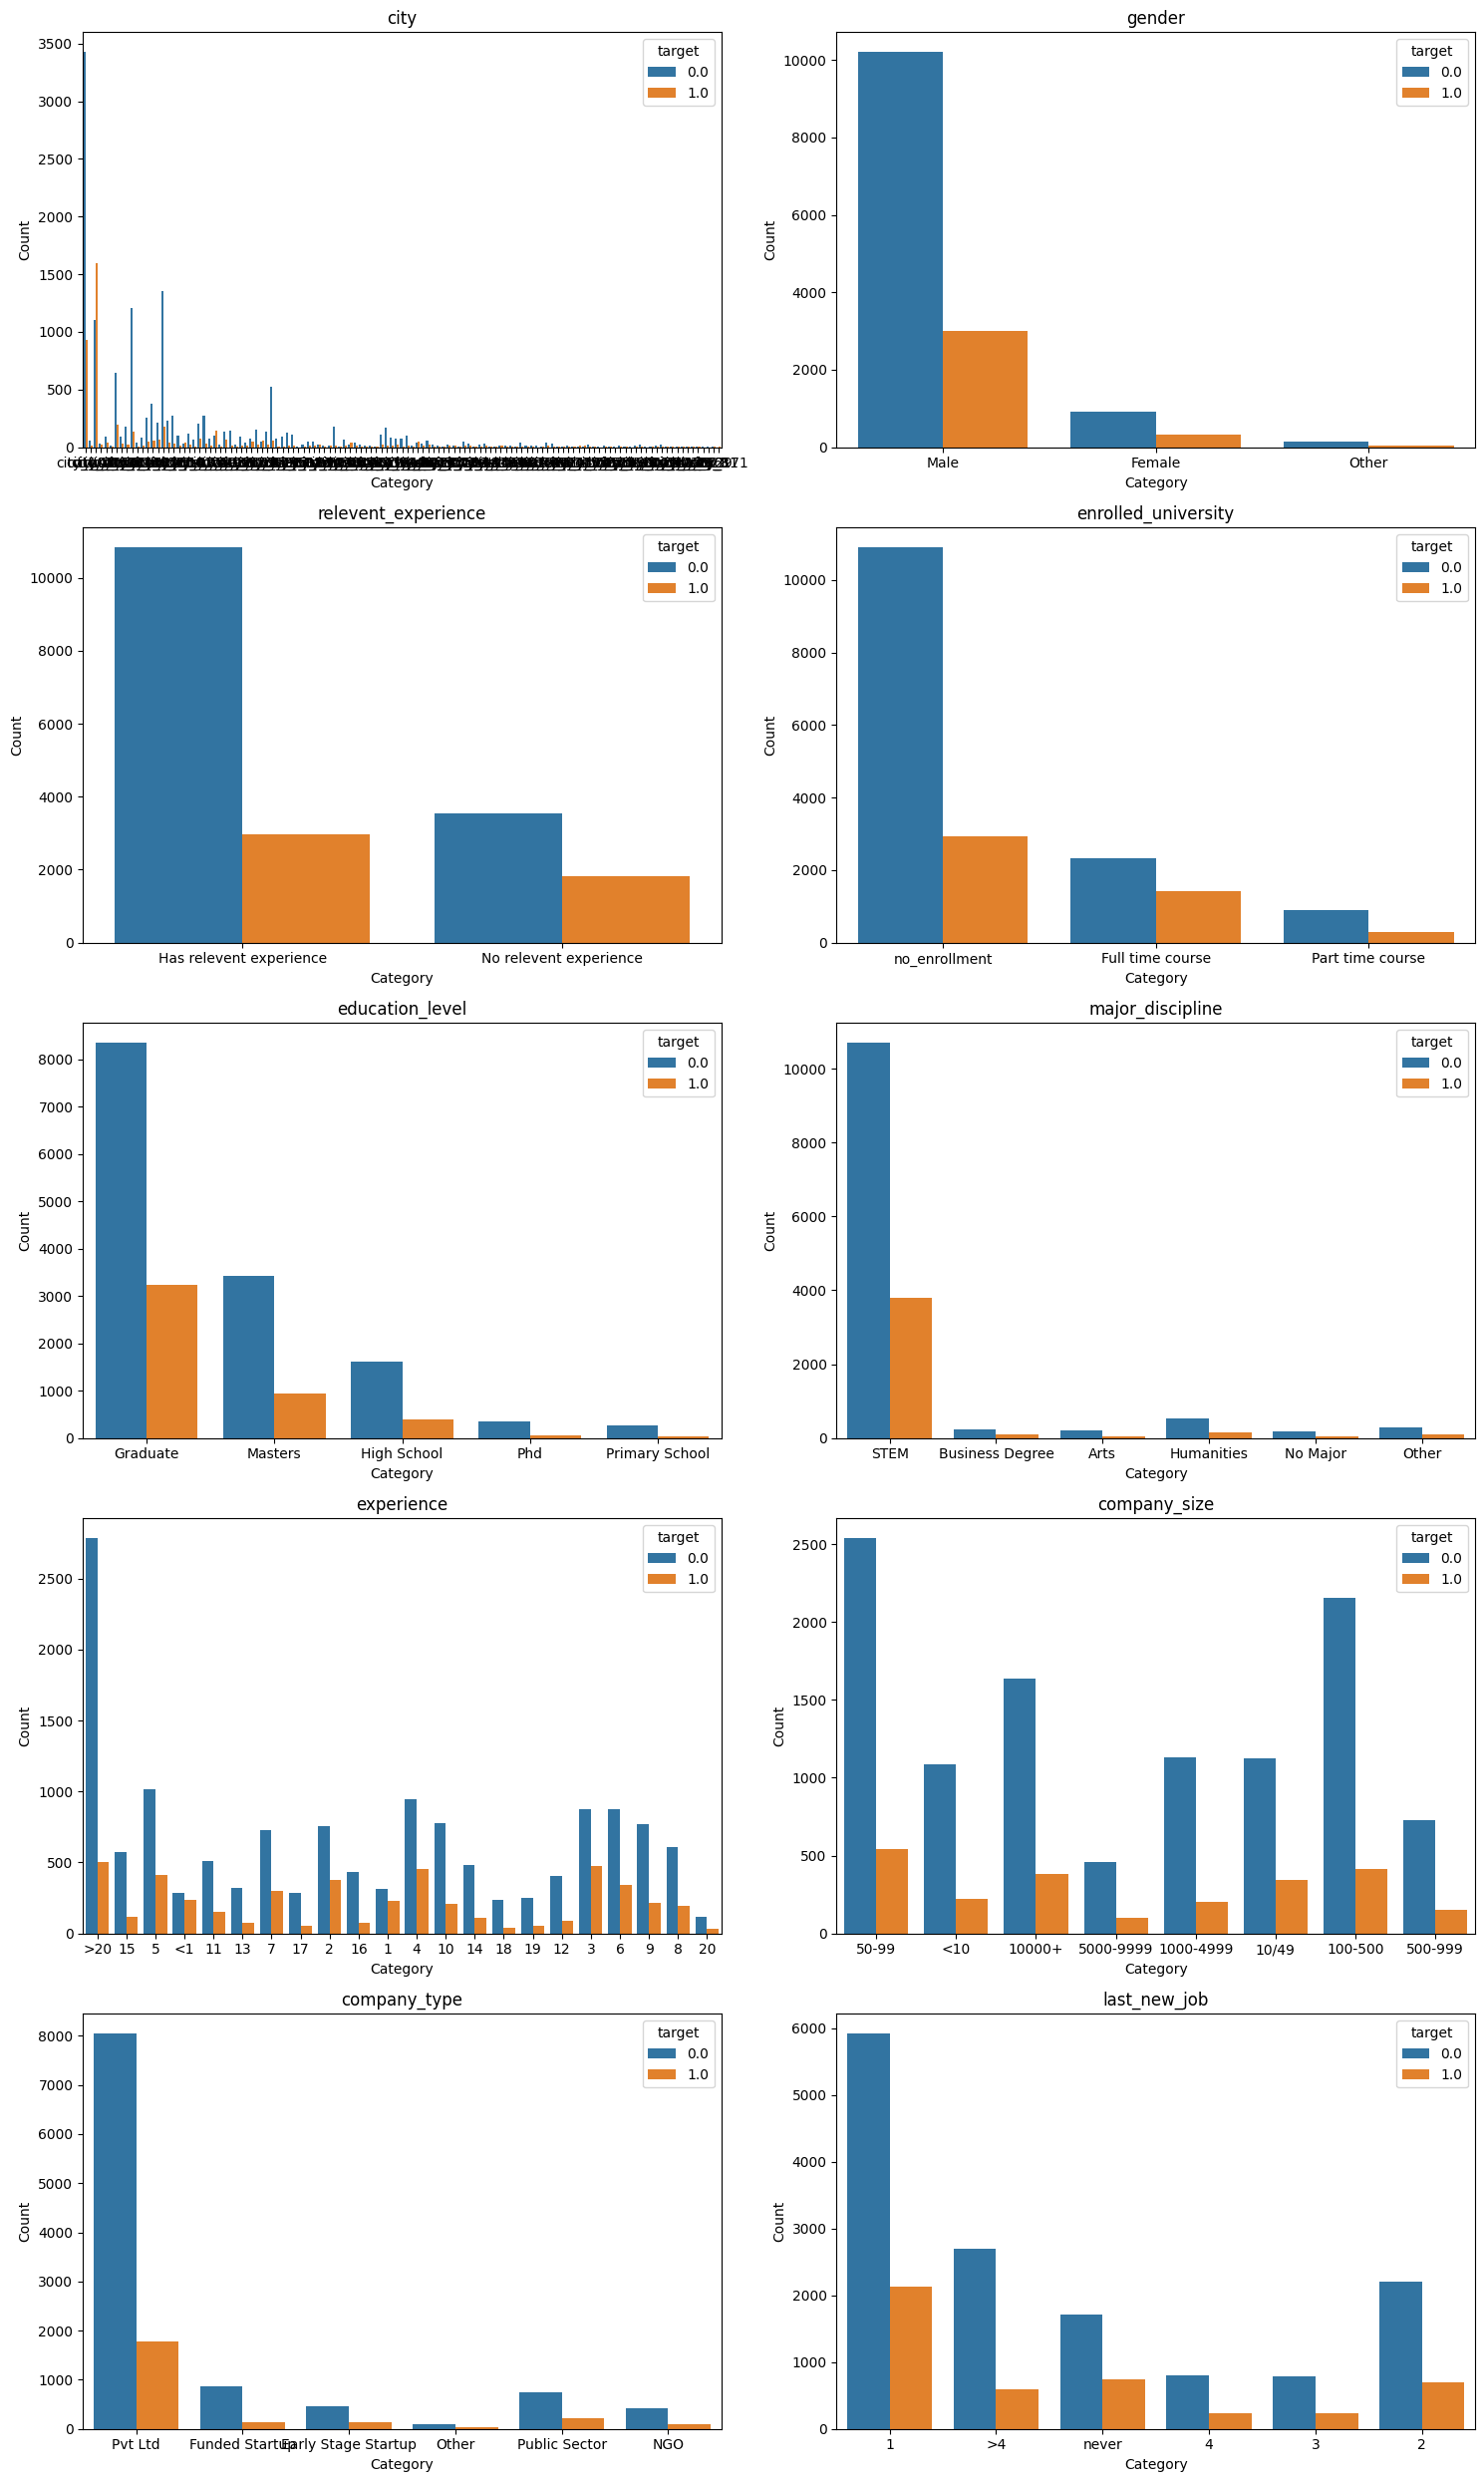

In [ ]:
feat_cat = cats
n = len(feat_cat)

rows = (n + 1) // 2
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for i in range(n):
    row = i // 2
    col = i % 2
    sns.countplot(x=df[feat_cat[i]], hue = df['target'], ax=ax[row, col])
    ax[row, col].set_title(feat_cat[i])
    ax[row, col].set_xlabel("Category")
    ax[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()

Berdasarkan visualisasi Countplot diatas : <br>
1. `city`
  - Berdasarkan histogram kebanyakan kandidat berasal dari city_103 yaitu sebanyak 4355 orang.
  - Kandidat memiliki asal city yang berbeda-beda dan bervariasi sehingga kolom city memiliki keragaman cukup tinggi, baik pada kandidat yang memilih mencari perubahan pekerjaan serta pada kandidat yang tidak mencari perubahan pekerjaan.
2. `gender`
  - Kandidat yang tidak ingin mencari perubahan pekerjaan untuk jenis kelamin laki-laki memiliki proporsi yang paling tinggi diantara kandidat lainnya
  - Jumlah kandidat laki-laki yang ingin mencari perubahan pekerjaan sebanyak 3012, dengan persentase sebanyak 22.7%
  - Jumlah kandidat perempuan yang ingin mencari perubahan pekerjaan sebanyak 326, dengan persentase sebanyak 26.3%
3. `relevant_experience` <br>
Kandidat yang tidak ingin mencari perubahan pekerjaan dengan pengalaman yang relevan dengan Data Science memiliki proporsi lebih tinggi dibanding dengan yang ingin mencari perubahan pekerjaan, namun jika dilihat dari persentase kandidat yang ingin mencari perubahan pekerjaan, kandidat yang switch career (tidak memiliki pengalaman yg relevan dengan Data Science) memiliki persentase yang lebih tinggi daripada kandidat dengan pengalaman relevan. Berikut rinciannya : 
  - Jumlah kandidat yang ingin mencari perubahan pekerjaan dengan pengalaman yg relevan dengan Data Science adalah sebesar 2.961, dengan persentase sebanyak 21.4%
  - Jumlah kandidat yang ingin mencari perubahan pekerjaan namun tidak memiliki pengalaman yang relevan dengan Data Science (switch career) adalah sebesar 3.550, dengan persentase sebanyak 66.1%
4. `enrolled_university` <br>
Kandidat yang ingin mencari perubahan pekerjaan yang bukan lulusan Universitas memiliki proporsi lebih rendah dibanding dengan yang tidak, namun jika dilihat dari persentase kandidat yang ingin mencari perubahan pekerjaan, kandidat yang full time course (fokus kuliah saja) memiliki persentase yang lebih tinggi daripada kandidat lainnya (tidak kuliah, kuliah-kerja), dengan rincian sebagai berikut : 
  - Jumlah kandidat yang ingin mencari perubahan pekerjaan yang tidak berkuliah (bukan lulusan Universitas) relevan adalah sebesar 2.921, dengan persentase sebanyak 21.1%
  - Jumlah kandidat yang ingin mencari perubahan pekerjaan yang full time course (fokus kuliah saja) adalah sebesar 1.431, dengan persentase sebanyak 61.5%
5. `education_level`
  - Kandidat yang mengikuti training kebanyakan adalah para graduate.
  - Tapi, jika dilihat dari proporsinya, perbedaan unique value dalam kolom `education_level` tidak memiliki pengaruh yang signifikan. Ini dikarenakan proporsi antara kandidat yang tidak sedang mencari perubahan pekerjaan (target 0) dan yang **sedang** mencari perubahan pekerjaan (target 1) sangat mirip (target 1 memiliki proporsi sekitar 25% dari total data pada setiap unique value).
6. `major_discipline`
  - Mayoritas kandidat memiliki bidang disiplin STEM (Sains, Teknologi, Kejuruteraan, dan Matematik).
  - Mirip dengan kolom `education_level`, perbedaan unique value dalam kolom `major_discipline` tidak memiliki pengaruh yang signifikan dikarenakan proporsi antara target 0 dan target 1 yang tidak jauh berbeda (target 1 memiliki proporsi dibawah 50%).
7. `experience`
  - Mayoritas total kandidat memiliki pengalaman bekerja selama lebih dari 20 tahun diikuti oleh kandidat dengan pengalaman kerja 3-6 tahun
  - Berdasarkan histogram, kandidat yang masuk dalam kelompok dengan pengalaman kerja 1 tahun dan pengalaman kerja dibawah 1 tahun memiliki persentase lebih tinggi untuk cenderung memilih pekerjaan baru dibandingkan dengan mereka yang memilih  untuk tidak mecari perubahan pekerjaan. Sebaliknya mereka yang memiliki pengalaman kerja dengan tahun lebih tinggi cenderung memiliki persentase lebih rendah untuk mencari pekerjaan baru
8. `company_size`
  - Mayoritas total kandidat berada pada kelompok kandidat yang memiliki company_Size dengan jumlah karyawan 50-99 orang.
  - Berdasarkan histogram persentase kandidat yang mencari perubahan pekerjaan cenderung tidak memliki perbedaan yang cukup jauh antar kelompok company_size.
9. `company_type` <br>
Kandidat yang berasal dari Perusahaan Pvt Ltd (Private Limited Company) yang tidak ingin mencari perubahan pekerjaan memiliki proporsi lebih tinggi dibanding dengan kandidat yang ingin mencari perubahan pekerjaan, namun jika dilihat dari persentase kandidat yang ingin mencari perubahan pekerjaan, kandidat yang berasal dari jenis perusahaan ‘other’ memiliki persentase yang lebih tinggi daripada kandidat lainnya, dengan rincian sebagai berikut : 
  - Jumlah kandidat yang berasal dari Perusahaan Pvt Ltd yang ingin mencari perubahan pekerjaan adalah sebesar 1.775, dengan persentase sebanyak 22%
  - Jumlah kandidat yang berasal dari Perusahaan other yang ingin mencari perubahan pekerjaan adalah sebesar 29, dengan persentase sebanyak 24%
10. `last_new_job` <br>
Kandidat yang tidak ingin mencari perubahan pekerjaan dengan history pergantian pekerjaan sebelumnya sebanyak 1x memiliki proporsi lebih tinggi dibanding dengan kandidat yang ingin mencari perubahan  pekerjaan. Namun jika dilihat dari persentase kandidat yang ingin mencari perubahan pekerjaan, kandidat yang belum pernah berganti pekerjaan (first time job) memiliki persentase paling tinggi dibanding dengan yang lainnya, dengan rincian sebagai berikut :
  - Sebanyak 2125 kandidat ingin mencari perubahan pekerjaan dengan pergantian pekerjaan sebanyak 1x, memiliki persentase sebesar 26.4%
  - Sebanyak 739 kandidat ingin mencari perubahan pekerjaan yang belum pernah berganti pekerjaan, memiliki persentase sebesar 30.1%

# **Multivariate Analysis**

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

<Axes: >

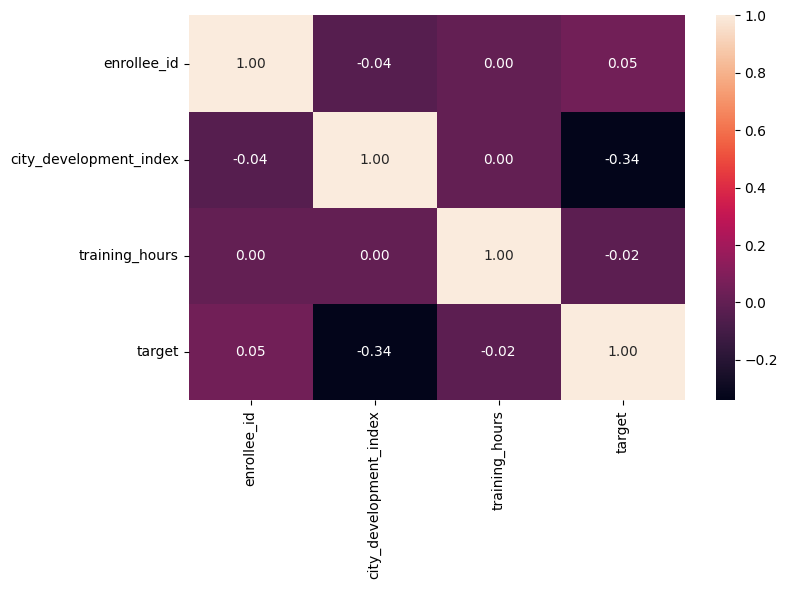

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Dari visualisasi diatas :
- Dari grafik heatmap diatas dapat dilihat korelasi antara feature dan target, berdasarkan garfik diatas diketahui korelasi target yang paling tinggi adalah dengan feature **city_development_index** sekitar -0.34,- yang artinya berkorelasi negatif.
- Selanjutnya antara target dan **training_hours** berkorelasi positif berkisar diangka 0.02, ini menunjukkan korelasi yang sangat lemah sehingga kolom training hours dapat di drop untuk analysis lebih lanjut. Tidak ditemukan korelasi diatas 0.7 antara sesama fitur. Ini berarti tidak ada yang berkorelasi kuat. Yang paling tinggi hanya terdapat diangka 0.34, dan dapat disimpulkan bahwa tidak ada feature yang redundan(berulang) tidak ada multikolinearitas.<br>

**Pola menarik:**
  - Semakin rendah nilai `city_development_index`, maka targetnya lebih banyak yang condong ke angka 1. Hal ini berarti ada korelasi dimana kandidat yang tinggal di kota kecil akan memiliki keinginan untuk melakukan perubahan pekerjaan.
  - Semakin kecil/sedikit waktu `training_hours`, maka targetnya lebih banyak yang condong ke angka 1. Ini menunjukkan korelasi negatif dimana semakin semakin sedikit *training hours* yang diikuti, semakin kandidat memiliki keinginan untuk mencari pekerjaan baru.

### Category Plot
Analisa feature numeric berdasarkan masing-masing feature categoric

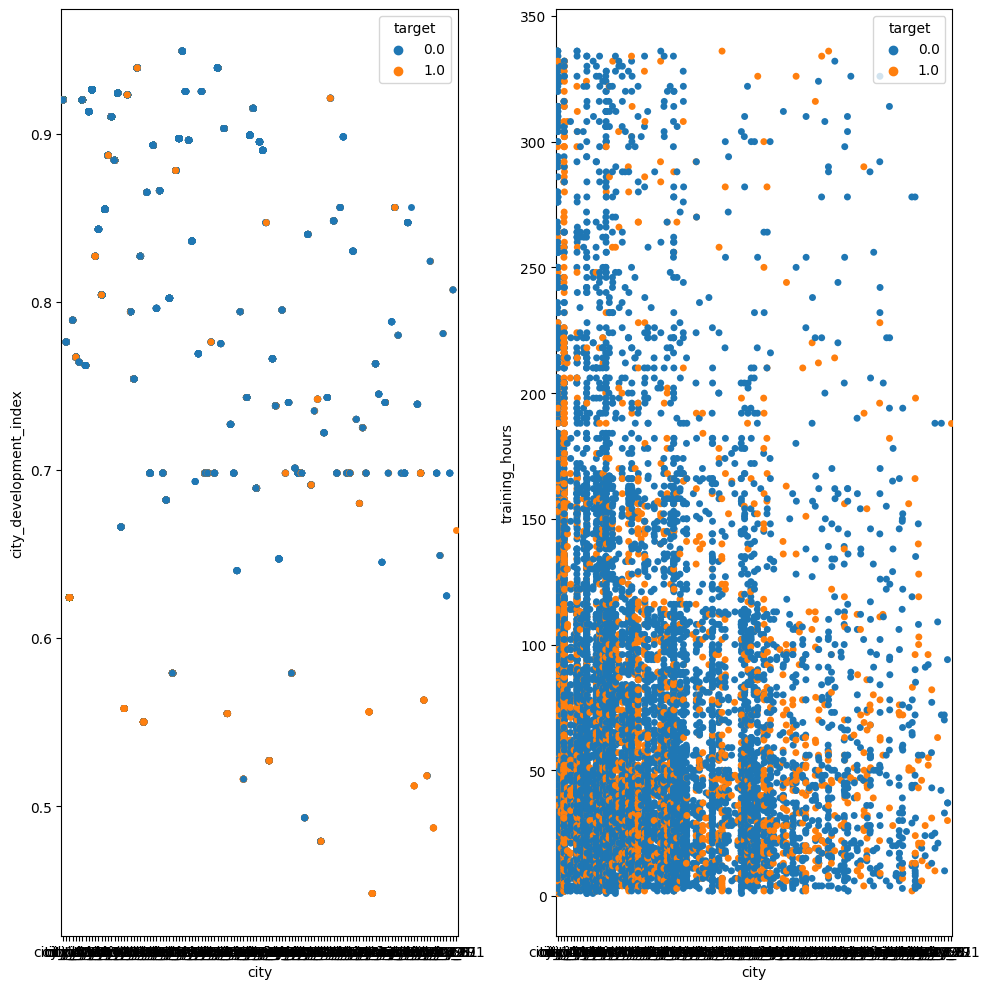

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(1, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='city', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

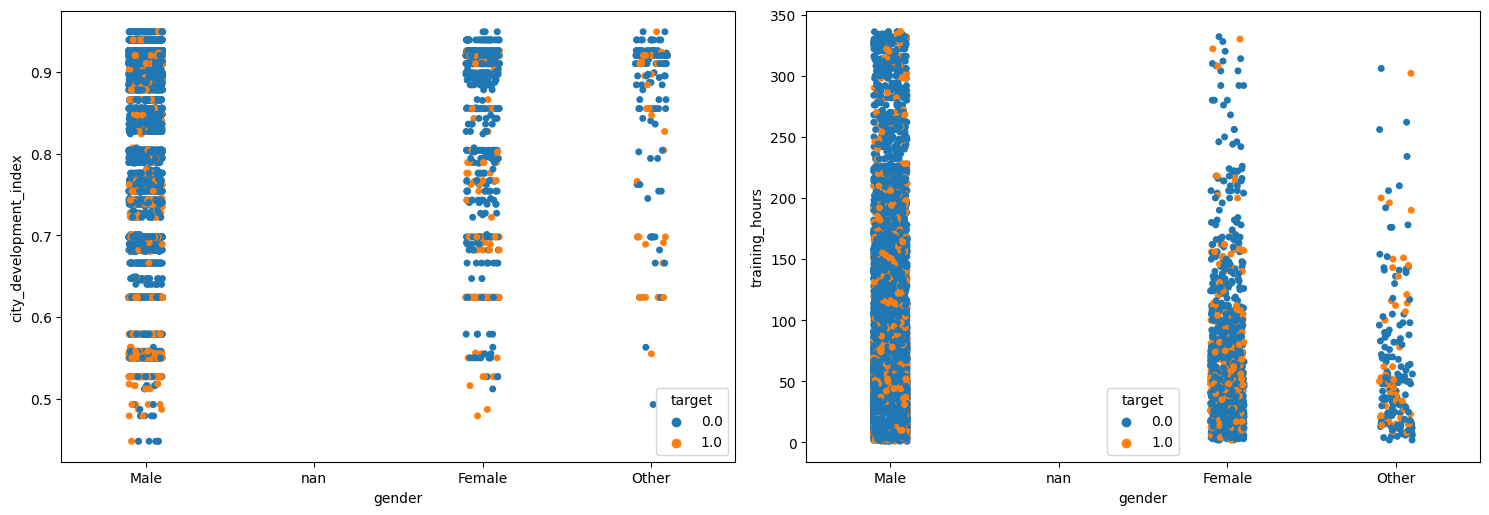

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='gender', y=nums[i], hue = df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

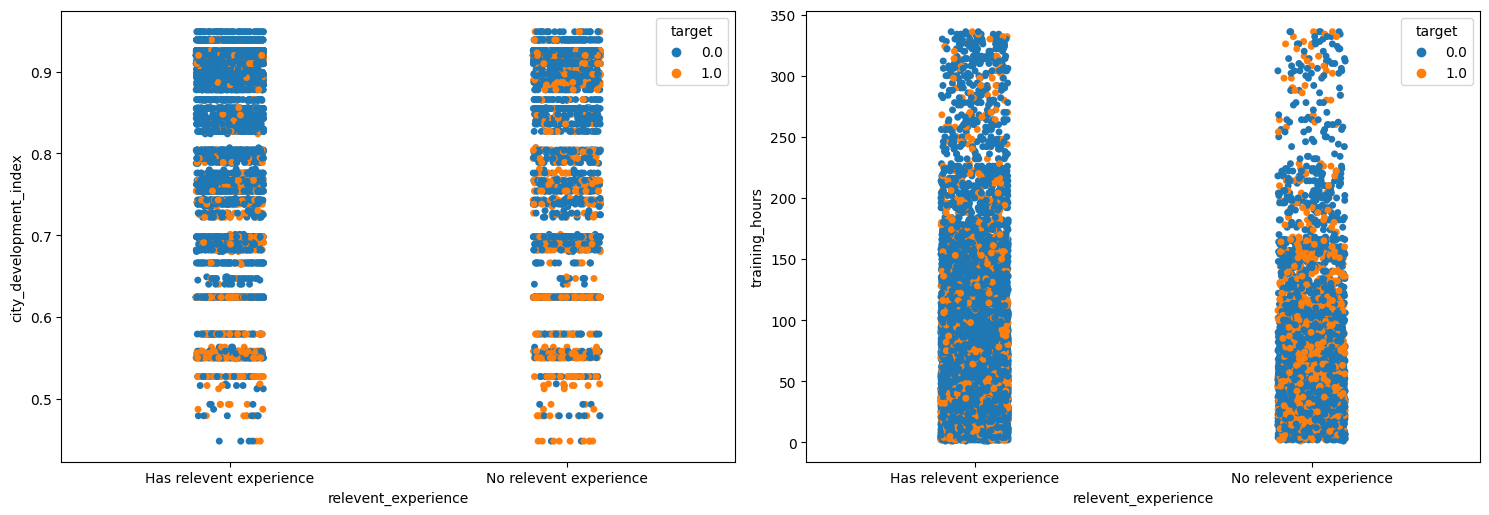

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='relevent_experience', y=nums[i], hue = df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

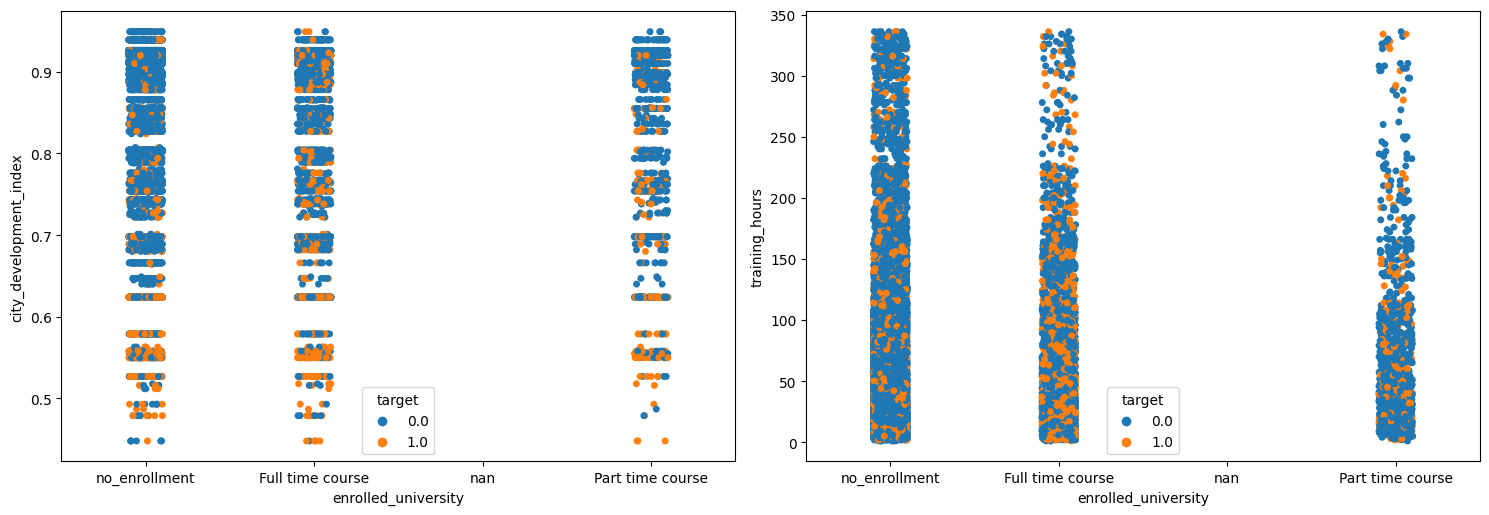

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='enrolled_university', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

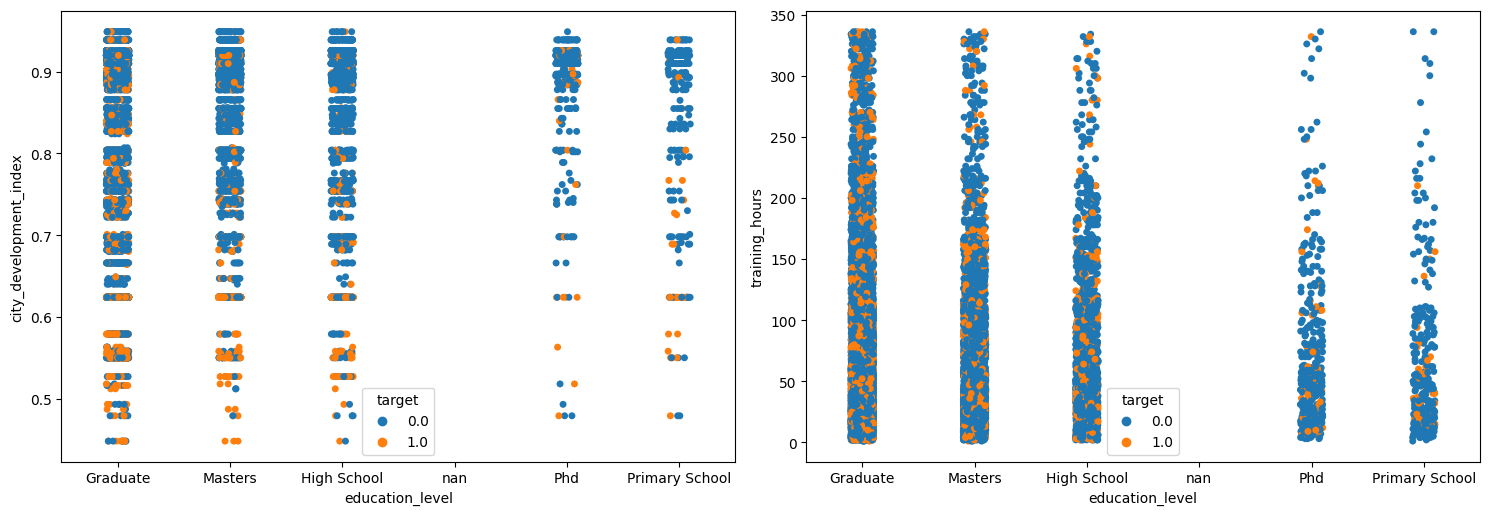

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='education_level', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

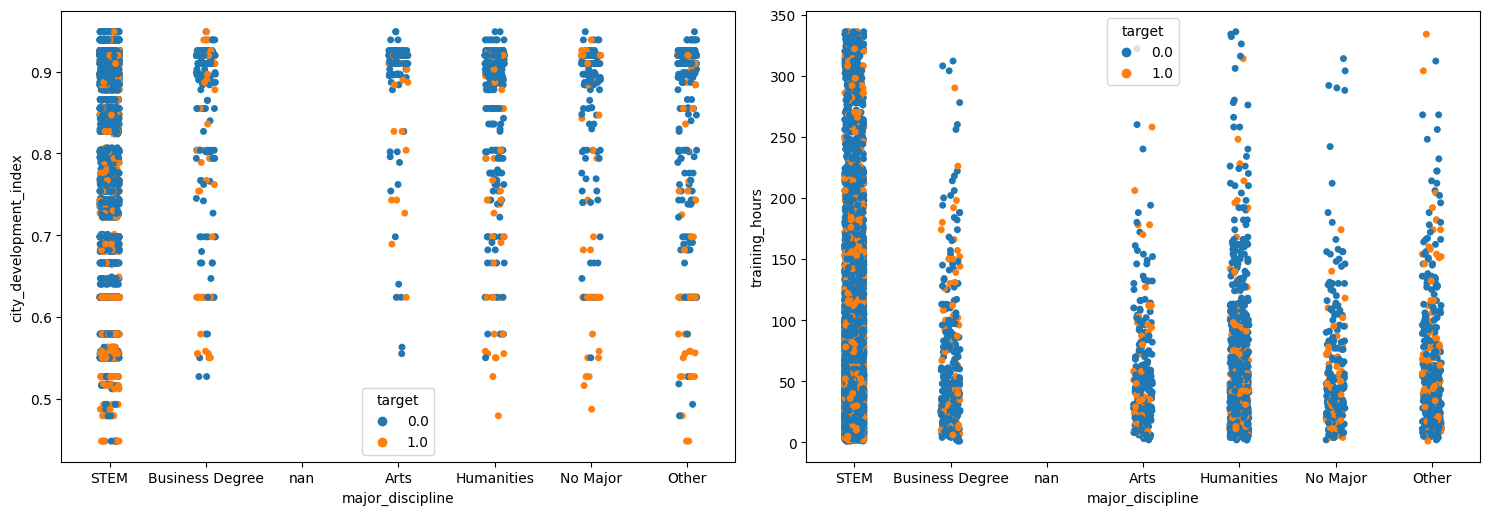

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='major_discipline', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

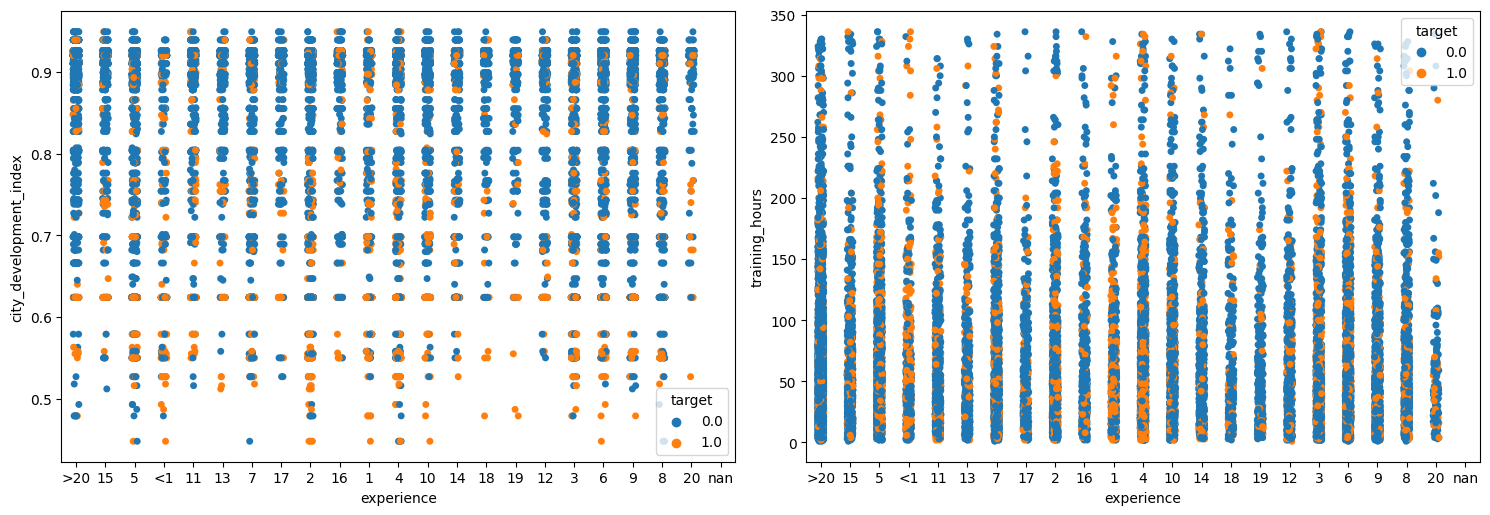

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='experience', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

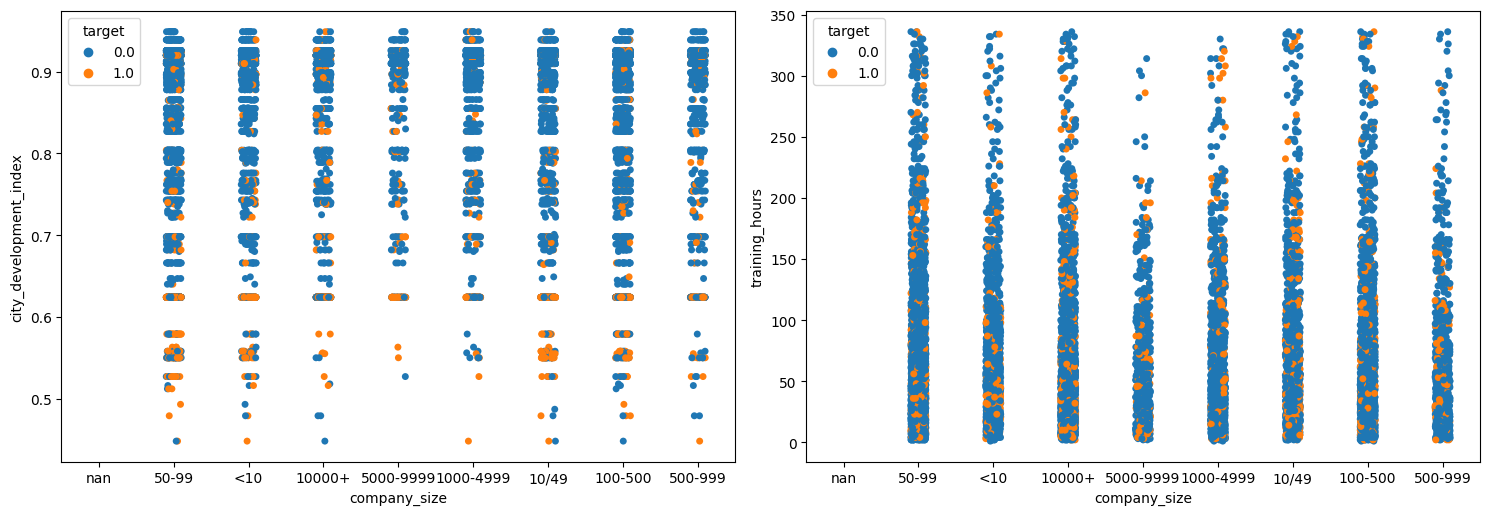

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='company_size', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

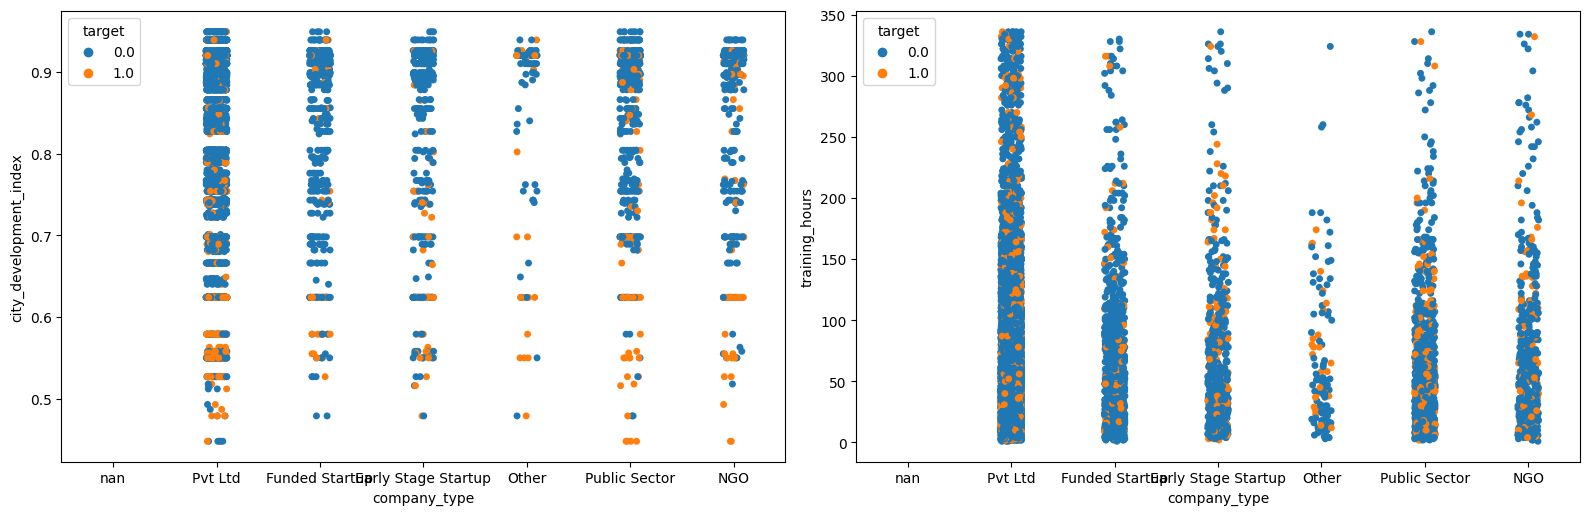

In [ ]:
fig = plt.figure(figsize=(16, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='company_type', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

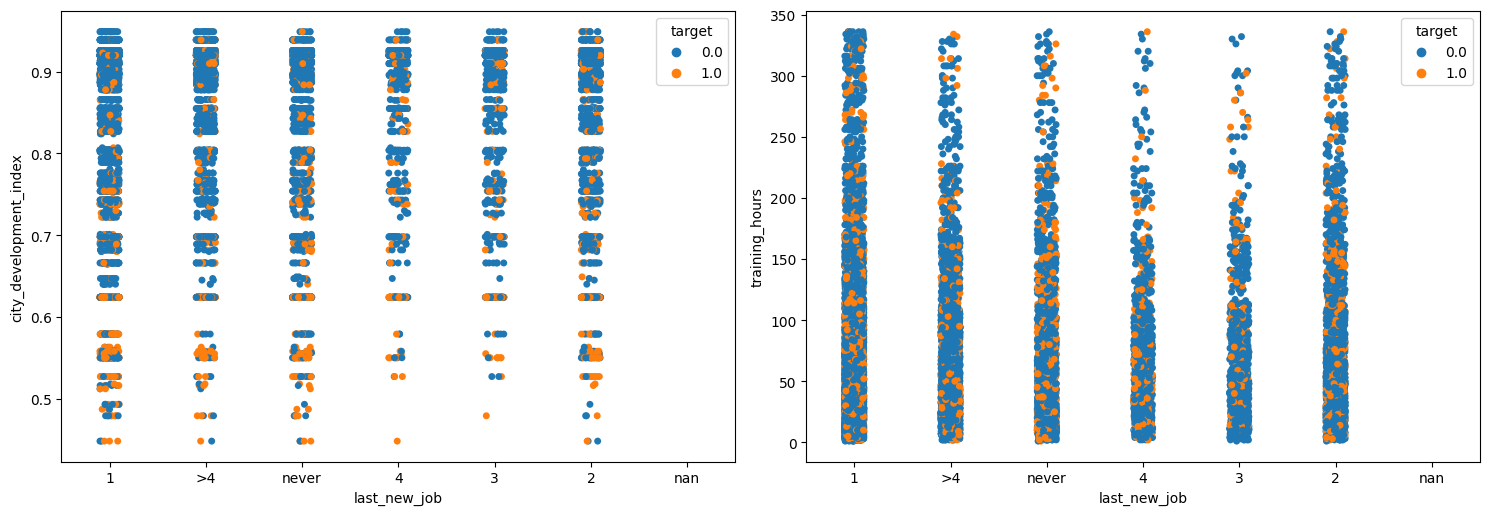

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='last_new_job', y=nums[i], hue=df['target']) # gambar catplot/stripplotnya
    plt.tight_layout()

Dari visualisasi diatas : <br>
tidak ditemukan data yang aneh antara 1 dengan lainnya (artinya : tidak ditemukan persebaran data 1 rendah dan 1 tinggi)

# **Business Insight**
- Jumlah kandidat yang ingin mencari perubahan pekerjaan dengan pengalaman yg relevan dengan Data Science adalah sebesar 2.961, dengan persentase sebanyak 21.4%, sedangkan jumlah kandidat yang ingin mencari perubahan pekerjaan namun tidak memiliki pengalaman yang relevan dengan Data Science (switch career) adalah sebesar 3.550, dengan persentase sebanyak 66.1%. <br>
Rekomendasi bisnis : Perusahaan bisa meninjau ulang untuk kandidat yang memiliki pengalaman yang relevan untuk switching career.
- Jumlah kandidat yang ingin mencari perubahan pekerjaan yang tidak berkuliah (bukan lulusan Universitas) relevan adalah sebesar 2.921, dengan persentase sebanyak 21.1%, sedangkan jumlah kandidat yang ingin mencari perubahan pekerjaan yang full time course (fokus kuliah saja) adalah sebesar 1.431, dengan persentase sebanyak 61.5%.<br>
Rekomendasi bisnis : persentase kandidat yang mencari perubahan pekerjaan bisa dinaikan dengan perusahaan dapat lebih mempromosikan benefit yang didapatkan dari training, salah satunya mendapatkan kesempatan dalam program penyaluran tenaga kerja perusahaan di bidang data scientist.
- Dari data kolom training_hours, dapat dilihat bahwa mayoritas kandidat dapat menyelesaikan training dalam jangka waktu kurang lebih antara 1-180 jam. Tetapi, terdapat data-data outliers yang menunjukkan adanya kandidat yang membutuhkan waktu lebih dari 180 jam untuk menyelesaikan training. Lebih fokus pada kandidat dengan training hours diatas 180, karena semakin lama waktu training yang dibutuhkan, akan memerlukan cost yang lebih besar.<br> 
Rekomendasi bisnis : Perusahaan lebih memperhatikan dalam melakukan screening kelayakan kandidat untuk mengikuti training pada perusahaan, sehingga kandidat yang didapatkan adalah mereka yang benar-benar serius dan berpeluang lulus dalam waktu yang diharapkan.
- Berdasarkan kolom city_development_index, kota dengan city development index sekitar 0.62 - 0.78 (kota kecil), memiliki proporsi kandidat yang ingin mencari perubahan pekerjaan cukup banyak dibanding dengan kandidat yang tidak ingin mencari perubahan pekerjaan. <br>
Rekomendasi bisnis : Perusahaan bisa lebih memperhatikan asal kota dari tiap kandidat yang mendaftar, karena kandidat yang berasal dari kota-kota kecil memiliki peluang untuk mencari perubahan pekerjaan.

# **STAGE 2: Data Preprocessing**

# **Scenario 1 (Baseline)**

### Feature Selection

In [ ]:
df_bl= pd.read_csv('https://raw.githubusercontent.com/she1031/tutorial_repo/main/aug_train%20(1).csv')
df_bl.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [ ]:
df_bl = df_bl[['city', 'city_development_index', 'gender', 'relevent_experience',
          'enrolled_university', 'education_level', 'major_discipline', 'experience',
          'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']]

## Feature Encoding

In [ ]:
num = ['city_development_index', 'training_hours']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']

for col in obj:
    print(f'''Value count kolom {col}:''')
    print(df_bl[col].value_counts())
    print()

Value count kolom city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Value count kolom gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts            

In [ ]:
# Rubah data
df_bl['company_size'] = df_bl['company_size'].replace('10/49', '10-49')
df_bl['company_size'] = df_bl['company_size'].replace('<10', '0-9') # dirubah karena ketika dijalankan menggunakan model Xg-Boost terjadi error

<ipython-input-38-37caaf60cd8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bl['company_size'] = df_bl['company_size'].replace('10/49', '10-49')
<ipython-input-38-37caaf60cd8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bl['company_size'] = df_bl['company_size'].replace('<10', '0-9') # dirubah karena ketika dijalankan menggunakan model Xg-Boost terjadi error


In [ ]:
#Label Encoding
df_bl['city'] = df_bl['city'].astype('category').cat.codes
df_bl['gender'] = df_bl['gender'].astype('category').cat.codes
df_bl['relevent_experience'] = df_bl['relevent_experience'].astype('category').cat.codes
df_bl['enrolled_university'] = df_bl['enrolled_university'].astype('category').cat.codes
df_bl['education_level'] = df_bl['education_level'].astype('category').cat.codes
df_bl['experience'] = df_bl['experience'].astype('category').cat.codes
df_bl['last_new_job'] = df_bl['last_new_job'].astype('category').cat.codes

<ipython-input-39-3d16447b9cdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bl['city'] = df_bl['city'].astype('category').cat.codes
<ipython-input-39-3d16447b9cdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bl['gender'] = df_bl['gender'].astype('category').cat.codes
<ipython-input-39-3d16447b9cdd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
#One Hot Encoding
for cat in ['major_discipline','company_size','company_type']:
  onehots = pd.get_dummies(df_bl[cat], prefix=cat)
  df_bl = df_bl.join(onehots)

In [ ]:
df_encod_bl = df_bl.drop(columns=['major_discipline','company_size','company_type']).copy()
df_encod_bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              19158 non-null  int8   
 1   city_development_index            19158 non-null  float64
 2   gender                            19158 non-null  int8   
 3   relevent_experience               19158 non-null  int8   
 4   enrolled_university               19158 non-null  int8   
 5   education_level                   19158 non-null  int8   
 6   experience                        19158 non-null  int8   
 7   last_new_job                      19158 non-null  int8   
 8   training_hours                    19158 non-null  int64  
 9   target                            19158 non-null  float64
 10  major_discipline_Arts             19158 non-null  uint8  
 11  major_discipline_Business Degree  19158 non-null  uint8  
 12  majo

# **Scenario 2**



In [ ]:
df_2 = df.copy()

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
# Rubah type data
df_2['target'] = df_2['target'].astype(int)
df_2['enrollee_id'] = df_2['enrollee_id'].astype(str)

### Handling Missing Value

In [ ]:
df_2.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
# Rubah data
df_2['company_size'] = df_2['company_size'].replace('10/49', '10-49')
df_2['company_size'] = df_2['company_size'].replace('<10', '10') # dirubah karena ketika dijalankan menggunakan model Xg-Boost terjadi error
df_2['last_new_job'] = df_2['last_new_job'].replace('never', '0')
df_2['last_new_job'] = df_2['last_new_job'].replace('>4', '5')

In [ ]:
df_2['gender'] = df_2['gender'].fillna('Other')
df_2['enrolled_university'].fillna(df_2['enrolled_university'].mode()[0], inplace=True)
df_2['education_level'].fillna(df_2['education_level'].mode()[0], inplace=True)
df_2['major_discipline'] = df_2['major_discipline'].fillna('Other')
df_2['experience'].fillna(df_2['experience'].mode()[0], inplace=True)
df_2['company_size'].fillna(df_2['company_size'].mode()[0], inplace=True)
df_2['company_type'] = df_2['company_type'].fillna('Other')
df_2['last_new_job'].fillna(df_2['last_new_job'].mode()[0], inplace=True)

**Note:**<br/>
Handling missing value masih bersifat temporary. Apabila setelah dicek performa model dengan handling seperti ini kurang memuaskan, maka akan dilakukan percobaan ulang pada tahap ini dan akan dicari cara penanganan yang lebih tepat agar dapat meningkatkan performa model.

### Handling Duplicated Data

In [ ]:
df_2.duplicated().sum()

0

In [ ]:
df_2.duplicated(subset=["enrollee_id"]).sum()

0

### Handling Invalid Values

In [ ]:
df_2.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Feature Extraction (Feature Engineering)

#### ***Membuat kolom* `experience_level`**

Untuk mengetahui kualifikasi dari tiap kandidat berdasarkan berapa tahun pengalaman di dunia kerja. Dapat dikategorikan menjadi beberapa level dan dibuat kolom baru `experience_level` untuk mempermudah analisis.
- `0` = novice 
- `1-5` = Advanced beginner
- `6-15` = Competent
- `16-20` = Proficient
- `21` = Expert (diubah menjadi int8 sehingga valuenya menjadi 21)

Note:
- Range dari setiap level dapat di-*customize* berdasarkan kebutuhan.
- 0 = experience <1 dan 21 = experience >20 (karena kolom `experience` diubah dari tipe data object menjadi int8)

In [ ]:
print(df_2["experience"].value_counts())

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64


In [ ]:
# Membuat kolom baru experience_level
novice = '<1'
advanced_beginner = ['1', '2', '3', '4', '5']
competent = ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
proficient = ['16', '17', '18', '19', '20']
expert = '>20'

def get_experience_level(x):
    if x == novice:
        return 'novice'
    elif x in advanced_beginner:
        return 'advanced beginner'
    elif x in competent:
        return 'competent'
    elif x in proficient:
        return 'proficient'
    elif x == expert:
        return 'expert'
    else:
        return None

df_2['experience_level'] = df_2['experience'].apply(get_experience_level)

print(df_2['experience_level'].value_counts())

competent            7840
advanced beginner    5863
expert               3351
proficient           1582
novice                522
Name: experience_level, dtype: int64


#### ***Membuat kolom* `Graduate` *(unique value 'yes' dan 'no')***
Membedakan antara kandidat yang sudah lulus kuliah (graduate) atau yang tidak/belum kuliah (non-graduate). Berikut adalah beberapa alasan kenapa kita memerlukan feature ini dalam memilih kandidat job hiring:
- Menyelesaikan gelar universitas dapat menandakan tingkat komitmen dan disiplin tertentu. Pemberi kerja mungkin melihat kandidat lulusan sebagai orang yang telah menunjukkan kemampuan untuk menetapkan dan mencapai tujuan, dan memiliki ketekunan untuk menyelesaikan program yang menantang.
- Pendidikan universitas biasanya mencakup berbagai macam mata pelajaran yang memberikan dasar pengetahuan yang umum, seperti critical thinking, problem solving, communication dan research skill.
- Secara umum, memiliki gelar seringkali menjadi syarat untuk pekerjaan data scientist level entry, meskipun hal ini dapat bervariasi tergantung pada perusahaan dan persyaratan pekerjaan tertentu.

Kolom yang digunakan adalah `education_level` dimana penggunaan unique value-nya pada kolom baru `graduate` adalah sebagai berikut:
- 'Primary School' dan 'High School' = 'no'
- 'Graduate', 'Masters', 'Phd' = 'yes'


In [ ]:
print(df_2["education_level"].value_counts())

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


In [ ]:
# Membuat kolom baru graduate
yes = ['Graduate', 'Masters', 'Phd']
no = ['Primary School', 'High School']

def get_graduation_status(x):
    if x in yes:
        return 'yes'
    else:
        return 'no'

df_2['graduate'] = df_2['education_level'].apply(get_graduation_status)

print(df_2['graduate'].value_counts())

yes    16833
no      2325
Name: graduate, dtype: int64


In [ ]:
df_2.sample(5)

enrollee_id      city  city_development_index gender  \
7703        32462  city_103                   0.920   Male   
8760        24461  city_136                   0.897   Male   
4340        32459  city_114                   0.926   Male   
18838        3627   city_73                   0.754  Other   
63           8433  city_100                   0.887   Male   

           relevent_experience enrolled_university education_level  \
7703    No relevent experience       no_enrollment        Graduate   
8760   Has relevent experience       no_enrollment         Masters   
4340    No relevent experience    Full time course        Graduate   
18838  Has relevent experience       no_enrollment        Graduate   
63     Has relevent experience       no_enrollment         Masters   

      major_discipline experience company_size company_type last_new_job  \
7703              STEM         15      100-500      Pvt Ltd            1   
8760              STEM          6        50-99      Pvt Ltd            1   
4340              STEM          6        50-99      Pvt Ltd            0   
18838             STEM          6        50-99        Other            1   
63          Humanities        >20      100-500      Pvt Ltd            5   

       training_hours  target experience_level graduate  
7703              196       0        competent      yes  
8760               81       0        competent      yes  
4340               16       0        competent      yes  
18838              44       1        competent      yes  
63                 48       0           expert      yes

### Feature Selection (Feature Engineering)

**`Drop Features enrollee_id`**

In [ ]:
# Drop feature enrollee_id
df_2.drop(["enrollee_id"],axis=1).sample(5)

city  city_development_index gender      relevent_experience  \
18618   city_28                   0.939   Male   No relevent experience   
4708    city_21                   0.624  Other   No relevent experience   
5968   city_136                   0.897  Other  Has relevent experience   
15397  city_103                   0.920   Male  Has relevent experience   
7781   city_114                   0.926   Male   No relevent experience   

      enrolled_university education_level major_discipline experience  \
18618       no_enrollment        Graduate  Business Degree         14   
4708     Full time course     High School            Other          7   
5968        no_enrollment         Masters             STEM         10   
15397       no_enrollment         Masters             STEM        >20   
7781        no_enrollment     High School            Other          6   

      company_size company_type last_new_job  training_hours  target  \
18618    1000-4999      Pvt Ltd            5             100       0   
4708         50-99        Other            1              76       0   
5968         10-49      Pvt Ltd            2              23       0   
15397       10000+      Pvt Ltd            5              24       0   
7781         50-99        Other            1             182       0   

      experience_level graduate  
18618        competent      yes  
4708         competent       no  
5968         competent      yes  
15397           expert      yes  
7781         competent       no

**`Drop Features city`**

In [ ]:
#Drop 'city`
#df_2['city'].nunique() #123
#df_2.drop('city', axis=1, inplace=True)

Kolom `city` bisa didrop karena memiliki jumlah unique values yang tinggi. Namun, untuk sekarang `city` akan dimasukkan terlebih dahulu dan akan dinilai performanya. Kita ingin mengetahui perbedaan performa model jika kita include dan tidak include kolom `city`.

**`Drop Features education_level dan experience`**

In [ ]:
#Drop `education_level`
#df_2.drop('education_level', axis=1, inplace=True)

In [ ]:
#Drop `experience`
#df_2.drop('education_level', axis=1, inplace=True)

Sedangkan, kolom `education_level` dan `experience`juga memiliki kemungkinan untuk di-drop karena di bagian feature extraction, kita telah membuat kolom baru yang memberikan insight yang kita butuhkan berdasarkan 2 kolom ini. Tapi, sama dengan kolom `city`, kita akan tetap memasukkan kedua kolom ini dan diuji performa modelnya terlebih dahulu.

**Notes:** <br/>
Karena jumlah data dan feature dalam dataset ini termasuk sedikit, semua fitur (kecuali enrollee_id) akan digunakan untuk machine learning.Setelah proses modelling, dapat dilihat mana fitur yang penting dan mana yang tidak, sehingga fitur yang tidak penting dapat di-drop.

#### ***Heatmap Correlation Plot***

In [ ]:
#plt.figure(figsize=(20, 20))
#sns.heatmap(smote_X_train.corr(), cmap='Blues', annot=True, fmt='.2f')

Pada dataset ini, heatmap correlation plot tidak digunakan untuk feature selection. Heatmap corrplot hanya mengecek hubungan linear antara fitur, sehingga bisa saja ada fitur yang penting namun memiliki hubungan non-linear yang tidak terlihat pada heatmap corrplot.

#### ***Additional Features***
#### **`Unemployment Duration`** <br/>
Jika diberikan kesempatan untuk bekerja sebagai data scientist, orang yang telah menganggur dalam waktu yang lama pasti akan tertarik untuk mengambil kesempatan ini dan beralih profesi. <br/>
 <br/>
#### **`Salary`** <br/>
Jika kita menawarkan gaji sebesar xxx, maka kemungkinan orang yang saat ini menerima gaji di bawah jumlah tersebut akan lebih tinggi untuk mempertimbangkan perubahan pekerjaan. <br/>
 <br/>
#### **`Relevance between current job and major discipline`** <br/>
Orang yang memiliki latar belakang pekerjaan di luar disiplin ilmu STEM atau disiplin ilmu yang relevan dengan bidang data science berkemungkinan tinggi untuk mempertimbangkan beralih profesi ke bidang data science jika diberikan kesempatan dalam program data scientist hiring. <br/>
 <br/>
#### **`Age`** <br/>
Orang yang telah memasuki usia tua cenderung kurang berminat untuk mengganti pekerjaan lagi. Alasannya bisa berupa: <br/>
- Sudah memiliki pengalaman dan keterampilan pada bidang pekerjaannya sekarang yang telah dikembangkan bertahun-tahun. <br/>
- Sudah nyaman dengan perusahaan yang sekarang dan cenderung merasa sulit untuk beradaptasi dengan work culture yang baru.

### Handling Outliers (Numeric)

Ada dua cara untuk meng-handle outliers, antara lain:
- z-score
- IQR

Berikut adalah perbedaan, kekurangan, dan kelebihan dari metode z-score dan IQR dalam menghandle outliers (ChatGPT, 2023):

Perbedaan: <br/>
- Z-score mengukur seberapa jauh nilai dari rata-rata dalam satuan standar deviasi, sedangkan IQR menghitung jarak antara kuartil atas dan kuartil bawah dalam distribusi data.
- Z-score bergantung pada rata-rata dan standar deviasi dari seluruh data, sedangkan IQR hanya bergantung pada kuartil atas dan kuartil bawah yang dihitung dari setengah data tengah.
- Z-score cocok digunakan pada data dengan distribusi normal, sedangkan IQR lebih tahan terhadap pencilan (outliers) dan dapat digunakan pada data dengan distribusi yang tidak normal.

Kekurangan:
- Z-score rentan terhadap outliers yang sangat ekstrem, karena standar deviasi dipengaruhi oleh outliers. Jika ada beberapa outlier yang sangat ekstrem, mereka dapat memberi dampak yang signifikan pada standar deviasi, sehingga menimbulkan kesalahan dalam pengukuran jarak data dari rata-rata.
- IQR dapat menghasilkan batas atas dan bawah yang terlalu longgar atau terlalu ketat jika data memiliki banyak atau sedikit outliers.
Kelebihan:
- Z-score dapat digunakan untuk menentukan nilai-nilai yang jauh dari norma, yaitu data yang terlalu besar atau terlalu kecil.
IQR dapat memfilter outlier dengan lebih baik daripada Z-score, terutama pada data yang tidak terdistribusi secara normal.
Dalam memilih metode untuk menghandle outliers, penting untuk mempertimbangkan sifat dataset yang digunakan serta karakteristik dari masing-masing metode.

*(only for reference)*

### ***z-score***

In [ ]:
#from scipy import stats
#print(f'Jumlah baris sebelum memfilter outlier: {len(df_2)}')

#filtered_entries = np.array([True] * len(df_2))

#for col in ['city_development_index',	'training_hours']:
    #zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    #filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
#df_2 = df_2[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

#print(f'Jumlah baris setelah memfilter outlier: {len(df_2)}')

### ***IQR***

In [ ]:
df_iqr = df_2.copy() 

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_iqr)}')

filtered_entries = np.array([True] * len(df_iqr))
for col in ['city_development_index',	'training_hours']:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_iqr[col] >= low_limit) & (df_iqr[col] <= high_limit)) & filtered_entries
    
df_iqr = df_iqr[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')

Jumlah baris sebelum memfilter outlier: 19158
Jumlah baris setelah memfilter outlier: 18157


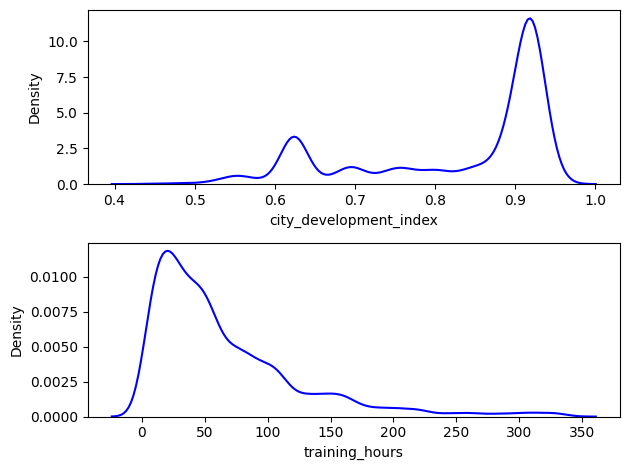

In [ ]:
#df_2 (before IQR)
num = ['city_development_index', 'training_hours']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for i in range(0, len(num)):
    plt.subplot(2,1, i+1)
    sns.kdeplot(x = df_2[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

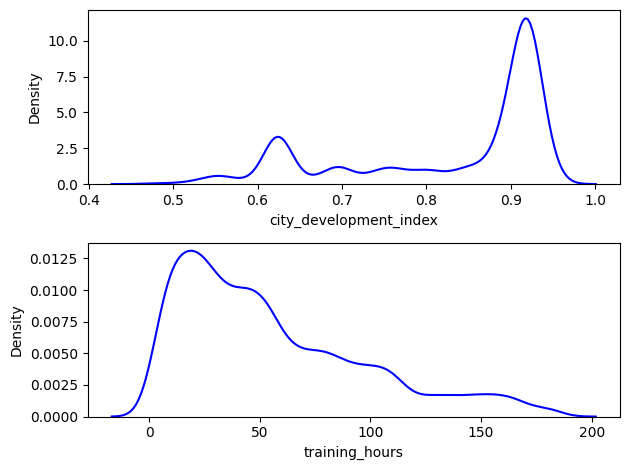

In [ ]:
 # df_iqr (after IQR)
num = ['city_development_index', 'training_hours']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for i in range(0, len(num)):
    plt.subplot(2,1, i+1)
    sns.kdeplot(x = df_iqr[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

### Feature Transformation (Numeric)

Skewed distribution =  MinMaxScaler <br/>
Normal distribution = StandardScaler <br/>
 <br/>
**Note:** <br/>
Tidak boleh menggunakan keduanya secara bersamaan.
<br/>


Karena data berdistribusi skewed, maka sebaiknya menggunakan normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_iqr['city_development_index_norm'] = MinMaxScaler().fit_transform(df_iqr['city_development_index'].values.reshape(len(df_iqr), 1))
df_iqr['training_hours_norm'] = MinMaxScaler().fit_transform(df_iqr['training_hours'].values.reshape(len(df_iqr), 1))

In [ ]:
df_iqr[['city_development_index','city_development_index_norm','training_hours','training_hours_norm']].describe()

city_development_index  city_development_index_norm  training_hours  \
count            18157.000000                 18157.000000    18157.000000   
mean                 0.829318                     0.745357       55.507518   
std                  0.122815                     0.261309       42.311416   
min                  0.479000                     0.000000        1.000000   
25%                  0.740000                     0.555319       22.000000   
50%                  0.903000                     0.902128       45.000000   
75%                  0.920000                     0.938298       80.000000   
max                  0.949000                     1.000000      184.000000   

       training_hours_norm  
count         18157.000000  
mean              0.297855  
std               0.231210  
min               0.000000  
25%               0.114754  
50%               0.240437  
75%               0.431694  
max               1.000000

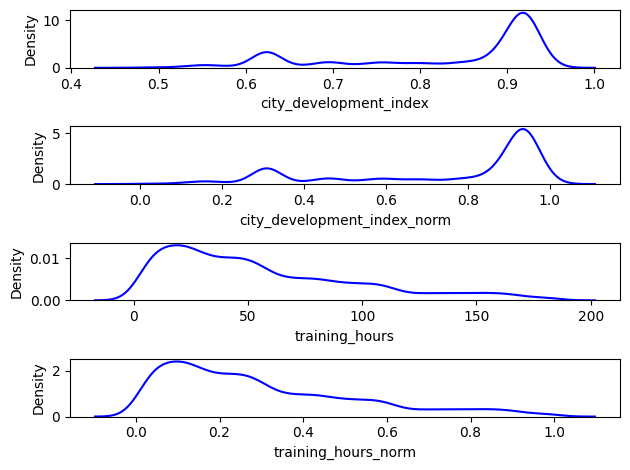

In [ ]:
num = ['city_development_index', 'city_development_index_norm', 'training_hours','training_hours_norm']

for i in range(0, len(num)):
    plt.subplot(4,1, i+1)
    sns.kdeplot(x = df_iqr[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

### Feature Encoding (Categorical)

In [ ]:
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for col in obj:
    print(f'''Value count kolom {col}:''')
    print(df_iqr[col].value_counts())
    print()

Value count kolom city:
city_103    4137
city_21     2562
city_16     1457
city_114    1282
city_160     795
            ... 
city_25        3
city_166       3
city_121       3
city_129       2
city_140       1
Name: city, Length: 121, dtype: int64

Value count kolom gender:
Male      12539
Other      4442
Female     1176
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13083
No relevent experience      5074
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13482
Full time course     3559
Part time course     1116
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11405
Masters            4168
High School        1913
Phd                 383
Primary School      288
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               13734
Other               3019
Humanities           635
Business Degree      308
Arts            

In [ ]:
# Label Encoding
df_iqr['city'] = df_iqr['city'].astype('category').cat.codes
df_iqr['gender'] = df_iqr['gender'].astype('category').cat.codes
df_iqr['relevent_experience'] = df_iqr['relevent_experience'].astype('category').cat.codes
df_iqr['enrolled_university'] = df_iqr['enrolled_university'].astype('category').cat.codes
df_iqr['education_level'] = df_iqr['education_level'].astype('category').cat.codes
df_iqr['experience'] = df_iqr['experience'].astype('category').cat.codes
df_iqr['last_new_job'] = df_iqr['last_new_job'].astype('category').cat.codes
df_iqr['experience_level'] = df_iqr['experience_level'].astype('category').cat.codes

In [ ]:
# Onehots Encoding
for cat in ['major_discipline','company_size','company_type','graduate']:
  onehots = pd.get_dummies(df_iqr[cat], prefix=cat)
  df_iqr = df_iqr.join(onehots)

In [ ]:
df_encod_2 = df_iqr.drop(columns=['enrollee_id','major_discipline','company_size','company_type','graduate', 'experience', 'training_hours',
                       'city_development_index']).copy()
df_encod_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18157 entries, 0 to 19157
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              18157 non-null  int8   
 1   gender                            18157 non-null  int8   
 2   relevent_experience               18157 non-null  int8   
 3   enrolled_university               18157 non-null  int8   
 4   education_level                   18157 non-null  int8   
 5   last_new_job                      18157 non-null  int8   
 6   target                            18157 non-null  int64  
 7   experience_level                  18157 non-null  int8   
 8   city_development_index_norm       18157 non-null  float64
 9   training_hours_norm               18157 non-null  float64
 10  major_discipline_Arts             18157 non-null  uint8  
 11  major_discipline_Business Degree  18157 non-null  uint8  
 12  majo

### Handling Class Imbalance - Oversampling

Ada 2 cara yang dapat digunakan untuk mengatasi class imbalance, yaitu:
- Oversampling
- Undersampling

Coba keduanya dan dibandingkan.


Note: <br/>
- [ ] ada mild (20-40%), moderate (1-20%), extreme (<1%)
- [ ] harus dijadikan presentase
- [ ] ini 33% jadi masuk ke mild jadi harus dilakukan handling, kecuali dia diatas mild.
- [ ] pas kerja kalo bisa harus menghindari smote ini.

In [ ]:
df_encod_2.sample(5)

city  gender  relevent_experience  enrolled_university  \
19057     5       1                    0                    2   
13284     5       1                    0                    2   
6368     48       0                    0                    2   
12580    30       1                    1                    0   
3083     69       1                    0                    2   

       education_level  last_new_job  target  experience_level  \
19057                0             5       1                 2   
13284                0             2       1                 2   
6368                 0             1       0                 0   
12580                4             0       0                 0   
3083                 0             5       0                 1   

       city_development_index_norm  training_hours_norm  ...  \
19057                     0.938298             0.300546  ...   
13284                     0.938298             0.273224  ...   
6368                      0.917021             0.453552  ...   
12580                     0.889362             0.114754  ...   
3083                      0.978723             0.207650  ...   

       company_size_500-999  company_size_5000-9999  \
19057                     0                       0   
13284                     0                       0   
6368                      0                       0   
12580                     0                       0   
3083                      0                       0   

       company_type_Early Stage Startup  company_type_Funded Startup  \
19057                                 0                            0   
13284                                 0                            0   
6368                                  0                            1   
12580                                 0                            0   
3083                                  0                            0   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
19057                 0                   0                           0   
13284                 0                   1                           0   
6368                  0                   0                           0   
12580                 0                   1                           0   
3083                  0                   0                           0   

       company_type_Pvt Ltd  graduate_no  graduate_yes  
19057                     1            0             1  
13284                     0            0             1  
6368                      0            0             1  
12580                     0            1             0  
3083                      1            0             1  

[5 rows x 32 columns]

In [ ]:
#pip install -U imbalanced-learn

In [ ]:
x = df_encod_2.drop(["target"], axis=1)
y = df_encod_2["target"]

In [ ]:
# Cek jumlah target sebelum di imbalance (apakah sudah sama atau belum)
y.value_counts()

0    13601
1     4556
Name: target, dtype: int64

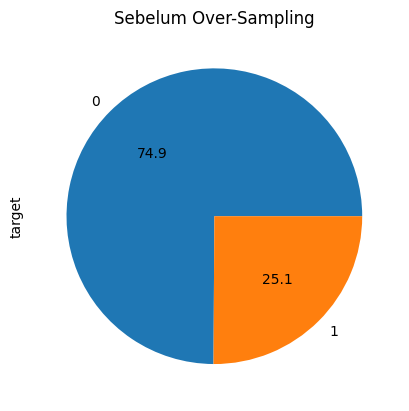

In [ ]:
ax = y.value_counts().plot.pie(autopct='%.1f')
_ = ax.set_title("Sebelum Over-Sampling")

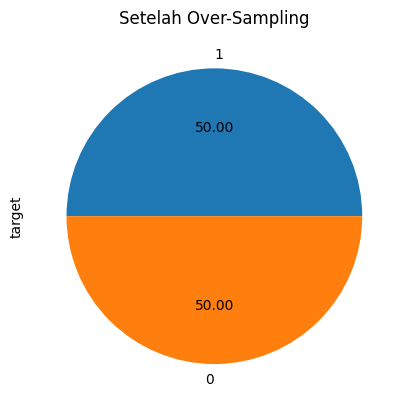

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
x_over, y_over = ros.fit_resample(x, y)

ax = y_over.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Setelah Over-Sampling")

In [ ]:
x_over["gender"].value_counts()

1    18271
2     7122
0     1809
Name: gender, dtype: int64

In [ ]:
y_over.value_counts()

1    13601
0    13601
Name: target, dtype: int64

# **Scenario 3**

In [ ]:
df_3 = df.copy()

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
# Rubah type data
df_3['target'] = df_3['target'].astype(int)
df_3['enrollee_id'] = df_3['enrollee_id'].astype(str)

### Handling Missing Value

In [ ]:
df_3.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
# Rubah data
df_3['company_size'] = df_3['company_size'].replace('10/49', '10-49')
df_3['company_size'] = df_3['company_size'].replace('<10', '10') # dirubah karena ketika dijalankan menggunakan model Xg-Boost terjadi error
df_3['last_new_job'] = df_3['last_new_job'].replace('never', '0')
df_3['last_new_job'] = df_3['last_new_job'].replace('>4', '5')

In [ ]:
df_3['gender'] = df_3['gender'].fillna('Other')
df_3['enrolled_university'].fillna(df_3['enrolled_university'].mode()[0], inplace=True)
df_3['education_level'].fillna(df_3['education_level'].mode()[0], inplace=True)
df_3['major_discipline'] = df_3['major_discipline'].fillna('Other')
df_3['experience'].fillna(df_3['experience'].mode()[0], inplace=True)
df_3['company_size'].fillna(df_3['company_size'].mode()[0], inplace=True)
df_3['company_type'] = df_3['company_type'].fillna('Other')
df_3['last_new_job'].fillna(df_3['last_new_job'].mode()[0], inplace=True)

### Handling Duplicated Data

In [ ]:
df_3.duplicated().sum()

0

In [ ]:
df_3.duplicated(subset=["enrollee_id"]).sum()

0

### Handling Invalid Values

In [ ]:
df_3.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Feature Extraction (Feature Engineering)

In [ ]:
print(df_3["experience"].value_counts())

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64


In [ ]:
# Membuat kolom baru experience_level
novice = '<1'
advanced_beginner = ['1', '2', '3', '4', '5']
competent = ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
proficient = ['16', '17', '18', '19', '20']
expert = '>20'

def get_experience_level(x):
    if x == novice:
        return 'novice'
    elif x in advanced_beginner:
        return 'advanced beginner'
    elif x in competent:
        return 'competent'
    elif x in proficient:
        return 'proficient'
    elif x == expert:
        return 'expert'
    else:
        return None

df_3['experience_level'] = df_3['experience'].apply(get_experience_level)

print(df_3['experience_level'].value_counts())

competent            7840
advanced beginner    5863
expert               3351
proficient           1582
novice                522
Name: experience_level, dtype: int64


In [ ]:
print(df_2["education_level"].value_counts())

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


In [ ]:
# Membuat kolom baru graduate
yes = ['Graduate', 'Masters', 'Phd']
no = ['Primary School', 'High School']

def get_graduation_status(x):
    if x in yes:
        return 'yes'
    else:
        return 'no'

df_3['graduate'] = df_3['education_level'].apply(get_graduation_status)

print(df_3['graduate'].value_counts())

yes    16833
no      2325
Name: graduate, dtype: int64


In [ ]:
df_3.sample(5)

enrollee_id      city  city_development_index gender  \
18479       25334  city_103                   0.920   Male   
19038       23543   city_16                   0.910   Male   
2178        19507  city_152                   0.698   Male   
12738       14696   city_21                   0.624  Other   
12364       20076   city_21                   0.624  Other   

           relevent_experience enrolled_university education_level  \
18479  Has relevent experience       no_enrollment         Masters   
19038  Has relevent experience       no_enrollment         Masters   
2178    No relevent experience       no_enrollment     High School   
12738  Has relevent experience       no_enrollment        Graduate   
12364  Has relevent experience    Full time course         Masters   

      major_discipline experience company_size company_type last_new_job  \
18479             STEM        >20        50-99      Pvt Ltd            4   
19038             STEM        >20        50-99        Other            1   
2178             Other          3        50-99        Other            0   
12738             STEM          3        50-99      Pvt Ltd            1   
12364             STEM          5        50-99        Other            0   

       training_hours  target   experience_level graduate  
18479              19       0             expert      yes  
19038              15       0             expert      yes  
2178               96       0  advanced beginner       no  
12738               8       1  advanced beginner      yes  
12364               3       0  advanced beginner      yes

### Feature Selection (Feature Engineering)

**`Drop Features enrollee_id`**

In [ ]:
# Drop feature enrollee_id
df_3.drop(["enrollee_id"],axis=1).sample(5)

city  city_development_index gender      relevent_experience  \
13776  city_103                   0.920   Male   No relevent experience   
6750    city_16                   0.910   Male   No relevent experience   
226    city_160                   0.920   Male  Has relevent experience   
3446    city_23                   0.899   Male  Has relevent experience   
18070  city_103                   0.920  Other  Has relevent experience   

      enrolled_university education_level major_discipline experience  \
13776    Part time course        Graduate             STEM         <1   
6750        no_enrollment        Graduate             STEM          4   
226      Part time course        Graduate             STEM        >20   
3446        no_enrollment        Graduate             STEM        >20   
18070       no_enrollment        Graduate             STEM        >20   

      company_size    company_type last_new_job  training_hours  target  \
13776        50-99           Other            1              38       1   
6750         50-99           Other            2              46       0   
226          50-99   Public Sector            5             108       0   
3446         50-99  Funded Startup            1             114       0   
18070        50-99         Pvt Ltd            5             100       0   

        experience_level graduate  
13776             novice      yes  
6750   advanced beginner      yes  
226               expert      yes  
3446              expert      yes  
18070             expert      yes

### Handling Outliers (Numeric)

### ***IQR***

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_3)}')

filtered_entries = np.array([True] * len(df_3))
for col in ['city_development_index',	'training_hours']:
    Q1 = df_3[col].quantile(0.25)
    Q3 = df_3[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_3[col] >= low_limit) & (df_3[col] <= high_limit)) & filtered_entries
    
df_3 = df_3[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_3)}')

Jumlah baris sebelum memfilter outlier: 19158
Jumlah baris setelah memfilter outlier: 18157


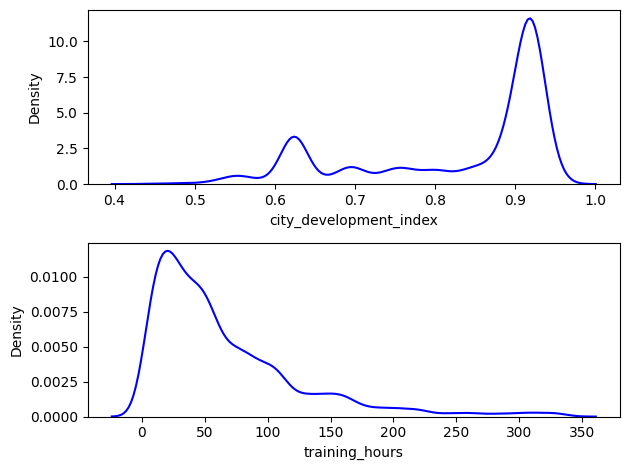

In [ ]:
#df (before IQR)
num = ['city_development_index', 'training_hours']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for i in range(0, len(num)):
    plt.subplot(2,1, i+1)
    sns.kdeplot(x = df[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

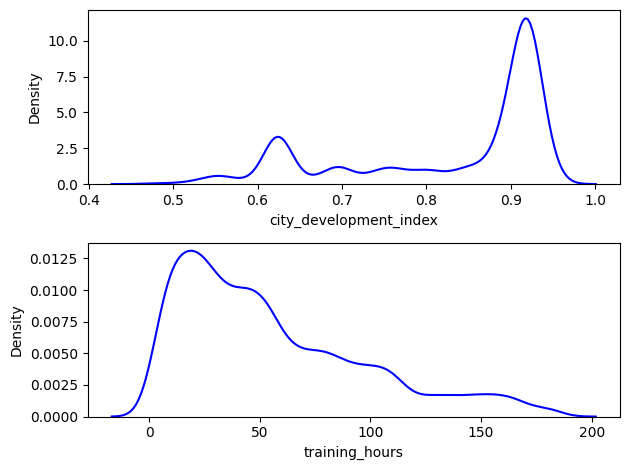

In [ ]:
# df_3 (after IQR)
num = ['city_development_index', 'training_hours']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for i in range(0, len(num)):
    plt.subplot(2,1, i+1)
    sns.kdeplot(x = df_3[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

### Feature Transformation (Numeric)

Skewed distribution =  MinMaxScaler <br/>
Normal distribution = StandardScaler <br/>
 <br/>

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_3['city_development_index_norm'] = MinMaxScaler().fit_transform(df_3['city_development_index'].values.reshape(len(df_3), 1))
df_3['training_hours_norm'] = MinMaxScaler().fit_transform(df_3['training_hours'].values.reshape(len(df_3), 1))

In [ ]:
df_3[['city_development_index','city_development_index_norm','training_hours','training_hours_norm']].describe()

city_development_index  city_development_index_norm  training_hours  \
count            18157.000000                 18157.000000    18157.000000   
mean                 0.829318                     0.745357       55.507518   
std                  0.122815                     0.261309       42.311416   
min                  0.479000                     0.000000        1.000000   
25%                  0.740000                     0.555319       22.000000   
50%                  0.903000                     0.902128       45.000000   
75%                  0.920000                     0.938298       80.000000   
max                  0.949000                     1.000000      184.000000   

       training_hours_norm  
count         18157.000000  
mean              0.297855  
std               0.231210  
min               0.000000  
25%               0.114754  
50%               0.240437  
75%               0.431694  
max               1.000000

### Feature Encoding (Categorical)

In [ ]:
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for col in obj:
    print(f'''Value count kolom {col}:''')
    print(df_3[col].value_counts())
    print()

Value count kolom city:
city_103    4137
city_21     2562
city_16     1457
city_114    1282
city_160     795
            ... 
city_25        3
city_166       3
city_121       3
city_129       2
city_140       1
Name: city, Length: 121, dtype: int64

Value count kolom gender:
Male      12539
Other      4442
Female     1176
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13083
No relevent experience      5074
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13482
Full time course     3559
Part time course     1116
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11405
Masters            4168
High School        1913
Phd                 383
Primary School      288
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               13734
Other               3019
Humanities           635
Business Degree      308
Arts            

In [ ]:
# Label Encoding
df_3['city'] = df_3['city'].astype('category').cat.codes
df_3['gender'] = df_3['gender'].astype('category').cat.codes
df_3['relevent_experience'] = df_3['relevent_experience'].astype('category').cat.codes
df_3['enrolled_university'] = df_3['enrolled_university'].astype('category').cat.codes
df_3['education_level'] = df_3['education_level'].astype('category').cat.codes
df_3['experience'] = df_3['experience'].astype('category').cat.codes
df_3['last_new_job'] = df_3['last_new_job'].astype('category').cat.codes
df_3['experience_level'] = df_3['experience_level'].astype('category').cat.codes

In [ ]:
# Onehots Encoding
for cat in ['major_discipline','company_size','company_type','graduate']:
  onehots = pd.get_dummies(df_3[cat], prefix=cat)
  df_3 = df_3.join(onehots)

In [ ]:
df_encod_3 = df_3.drop(columns=['enrollee_id','major_discipline','company_size','company_type','graduate', 'experience', 'training_hours',
                       'city_development_index']).copy()
df_encod_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18157 entries, 0 to 19157
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              18157 non-null  int8   
 1   gender                            18157 non-null  int8   
 2   relevent_experience               18157 non-null  int8   
 3   enrolled_university               18157 non-null  int8   
 4   education_level                   18157 non-null  int8   
 5   last_new_job                      18157 non-null  int8   
 6   target                            18157 non-null  int64  
 7   experience_level                  18157 non-null  int8   
 8   city_development_index_norm       18157 non-null  float64
 9   training_hours_norm               18157 non-null  float64
 10  major_discipline_Arts             18157 non-null  uint8  
 11  major_discipline_Business Degree  18157 non-null  uint8  
 12  majo

### Handling Class Imbalance - Undersampling

In [ ]:
df_encod_3.sample(5)

city  gender  relevent_experience  enrolled_university  \
455       5       1                    0                    2   
10517    13       1                    1                    2   
14687    63       1                    0                    2   
5096     13       1                    0                    2   
18104    48       1                    1                    2   

       education_level  last_new_job  target  experience_level  \
455                  0             1       0                 1   
10517                1             3       0                 0   
14687                0             1       1                 1   
5096                 0             3       0                 1   
18104                2             5       0                 1   

       city_development_index_norm  training_hours_norm  ...  \
455                       0.938298             0.092896  ...   
10517                     0.951064             0.213115  ...   
14687                     0.308511             0.535519  ...   
5096                      0.951064             0.836066  ...   
18104                     0.917021             0.475410  ...   

       company_size_500-999  company_size_5000-9999  \
455                       0                       0   
10517                     0                       0   
14687                     0                       0   
5096                      0                       0   
18104                     0                       0   

       company_type_Early Stage Startup  company_type_Funded Startup  \
455                                   0                            1   
10517                                 0                            0   
14687                                 0                            0   
5096                                  0                            1   
18104                                 0                            0   

       company_type_NGO  company_type_Other  company_type_Public Sector  \
455                   0                   0                           0   
10517                 0                   0                           0   
14687                 0                   0                           0   
5096                  0                   0                           0   
18104                 1                   0                           0   

       company_type_Pvt Ltd  graduate_no  graduate_yes  
455                       0            0             1  
10517                     1            1             0  
14687                     1            0             1  
5096                      0            0             1  
18104                     0            0             1  

[5 rows x 32 columns]

In [ ]:
#pip install -U imbalanced-learn

In [ ]:
x = df_encod_3.drop(["target"], axis=1)
y = df_encod_3["target"]

In [ ]:
# Cek jumlah target sebelum di imbalance (apakah sudah sama atau belum)
y.value_counts()

0    13601
1     4556
Name: target, dtype: int64

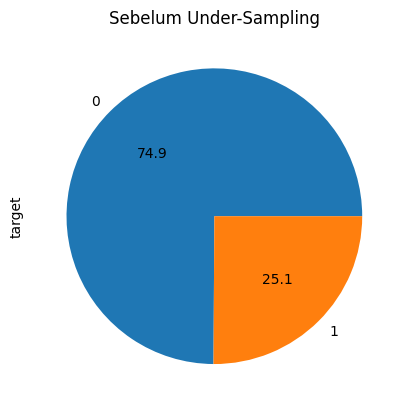

In [ ]:
ax = y.value_counts().plot.pie(autopct='%.1f')
_ = ax.set_title("Sebelum Under-Sampling")

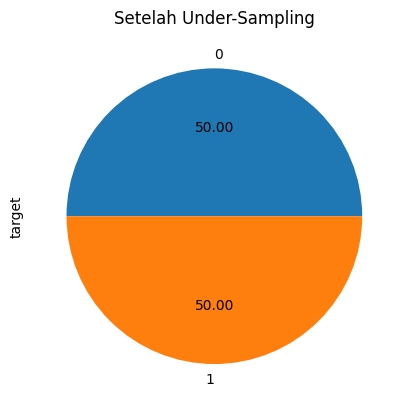

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
x_under, y_under = rus.fit_resample(x, y)

ax = y_under.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Setelah Under-Sampling")

In [ ]:
x_under["gender"].value_counts()

1    6118
2    2401
0     593
Name: gender, dtype: int64

In [ ]:
y_under.value_counts()

0    4556
1    4556
Name: target, dtype: int64

 # **STAGE 3 - Machine Learning Evaluation and Supervised Learning**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x_over.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

# **Scenario 1 (Baseline)**

In [ ]:
from sklearn.model_selection import train_test_split

x_bl = df_encod_bl.drop(['target'], axis=1)
y_bl = df_encod_bl['target']
x_train, x_test, y_train, y_test = train_test_split(x_bl, y_bl, test_size=0.3, random_state=42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
eval_classification(lr, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.57
Recall (Test Set): 0.26
F1-Score (Test Set): 0.36
AUC: 0.60


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = LogisticRegression(random_state=42, max_iter = 1000)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.5781796280779412

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[4016,  284],
       [1071,  377]])

## k-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train) # fit model KNN dari data train

y_pred = knn.predict(x_test)
eval_classification(knn, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.47
Recall (Test Set): 0.30
F1-Score (Test Set): 0.36
AUC: 0.59


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

0.4649088671181233

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3809,  491],
       [1018,  430]])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
eval_classification(dt, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.42
Recall (Test Set): 0.45
F1-Score (Test Set): 0.43
AUC: 0.62


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  DecisionTreeClassifier(random_state=42)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

0.43587249858435334

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3413,  887],
       [ 799,  649]])

## Bagging: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
eval_classification(rf, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.57
Recall (Test Set): 0.44
F1-Score (Test Set): 0.50
AUC: 0.66


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  RandomForestClassifier(random_state=42)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

0.587664801418112

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3822,  478],
       [ 813,  635]])

## Boosting: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
eval_classification(ab, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.60
Recall (Test Set): 0.31
F1-Score (Test Set): 0.41
AUC: 0.62


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  AdaBoostClassifier(random_state=42)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

0.6007732041827157

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3992,  308],
       [ 995,  453]])

## Boosting: XgBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy (Test Set): 0.78
Precision (Test Set): 0.57
Recall (Test Set): 0.47
F1-Score (Test Set): 0.52
AUC: 0.68


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

0.576273451306377

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


array([[3791,  509],
       [ 763,  685]])

## Catboost

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
eval_classification(cb, y_pred, x_train, y_train, x_test, y_test)

Learning rate set to 0.031214
0:	learn: 0.6770274	total: 65.8ms	remaining: 1m 5s
1:	learn: 0.6619806	total: 79.4ms	remaining: 39.6s
2:	learn: 0.6497664	total: 94.9ms	remaining: 31.5s
3:	learn: 0.6366453	total: 110ms	remaining: 27.5s
4:	learn: 0.6245651	total: 126ms	remaining: 25.1s
5:	learn: 0.6135034	total: 142ms	remaining: 23.5s
6:	learn: 0.6032240	total: 158ms	remaining: 22.3s
7:	learn: 0.5937941	total: 169ms	remaining: 21s
8:	learn: 0.5847703	total: 184ms	remaining: 20.2s
9:	learn: 0.5774937	total: 206ms	remaining: 20.4s
10:	learn: 0.5697114	total: 224ms	remaining: 20.1s
11:	learn: 0.5622128	total: 251ms	remaining: 20.7s
12:	learn: 0.5556013	total: 266ms	remaining: 20.2s
13:	learn: 0.5487089	total: 283ms	remaining: 20s
14:	learn: 0.5438408	total: 295ms	remaining: 19.4s
15:	learn: 0.5380090	total: 310ms	remaining: 19.1s
16:	learn: 0.5320151	total: 326ms	remaining: 18.9s
17:	learn: 0.5284301	total: 334ms	remaining: 18.2s
18:	learn: 0.5243530	total: 348ms	remaining: 18s
19:	learn: 0.5

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = CatBoostClassifier(random_state=42)

result = cross_val_score(model, x_bl, y_bl, cv=5, scoring='precision') # calculate score
result.mean()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6207623	total: 31.6ms	remaining: 6.29s
5:	learn: 0.6095944	total: 37.8ms	remaining: 6.26s
6:	learn: 0.5992946	total: 44.3ms	remaining: 6.29s
7:	learn: 0.5892079	total: 50.4ms	remaining: 6.25s
8:	learn: 0.5799849	total: 56.5ms	remaining: 6.22s
9:	learn: 0.5714987	total: 62.7ms	remaining: 6.21s
10:	learn: 0.5640501	total: 69ms	remaining: 6.2s
11:	learn: 0.5568300	total: 74.7ms	remaining: 6.15s
12:	learn: 0.5505063	total: 80.5ms	remaining: 6.11s
13:	learn: 0.5446513	total: 86.4ms	remaining: 6.09s
14:	learn: 0.5393178	total: 93ms	remaining: 6.1s
15:	learn: 0.5349111	total: 98.5ms	remaining: 6.05s
16:	learn: 0.5303426	total: 105ms	remaining: 6.06s
17:	learn: 0.5266748	total: 109ms	remaining: 5.97s
18:	learn: 0.5218783	total: 118ms	remaining: 6.09s
19:	learn: 0.5186877	total: 122ms	remaining: 5.98s
20:	learn: 0.5147594	total: 128ms	remaining: 5.97s
21:	learn: 0.5113048	total: 134ms	remaining: 5.96s
22:	learn: 0.5085465	total: 140

0.5959391620451369

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

Learning rate set to 0.031214
0:	learn: 0.6770274	total: 7.02ms	remaining: 7.01s
1:	learn: 0.6619806	total: 12.8ms	remaining: 6.4s
2:	learn: 0.6497664	total: 18.4ms	remaining: 6.11s
3:	learn: 0.6366453	total: 28.8ms	remaining: 7.17s
4:	learn: 0.6245651	total: 34.5ms	remaining: 6.87s
5:	learn: 0.6135034	total: 39.8ms	remaining: 6.6s
6:	learn: 0.6032240	total: 45.8ms	remaining: 6.5s
7:	learn: 0.5937941	total: 49.8ms	remaining: 6.17s
8:	learn: 0.5847703	total: 55.7ms	remaining: 6.13s
9:	learn: 0.5774937	total: 61.2ms	remaining: 6.06s
10:	learn: 0.5697114	total: 67ms	remaining: 6.02s
11:	learn: 0.5622128	total: 72.9ms	remaining: 6s
12:	learn: 0.5556013	total: 78.3ms	remaining: 5.95s
13:	learn: 0.5487089	total: 84.1ms	remaining: 5.92s
14:	learn: 0.5438408	total: 89.9ms	remaining: 5.91s
15:	learn: 0.5380090	total: 95.7ms	remaining: 5.89s
16:	learn: 0.5320151	total: 101ms	remaining: 5.87s
17:	learn: 0.5284301	total: 104ms	remaining: 5.7s
18:	learn: 0.5243530	total: 114ms	remaining: 5.9s
19:	l

array([[3811,  489],
       [ 768,  680]])

# **Scenario 2**

In [ ]:
from sklearn.model_selection import train_test_split

x_2 = x_over
y_2 = y_over
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.3, random_state=42)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18157 entries, 0 to 19157
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              18157 non-null  int8   
 1   gender                            18157 non-null  int8   
 2   relevent_experience               18157 non-null  int8   
 3   enrolled_university               18157 non-null  int8   
 4   education_level                   18157 non-null  int8   
 5   last_new_job                      18157 non-null  int8   
 6   experience_level                  18157 non-null  int8   
 7   city_development_index_norm       18157 non-null  float64
 8   training_hours_norm               18157 non-null  float64
 9   major_discipline_Arts             18157 non-null  uint8  
 10  major_discipline_Business Degree  18157 non-null  uint8  
 11  major_discipline_Humanities       18157 non-null  uint8  
 12  majo

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
eval_classification(lr, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.73
Recall (Test Set): 0.76
F1-Score (Test Set): 0.74
AUC: 0.74


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = LogisticRegression(random_state=42, max_iter = 1000)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

0.7309084382951685

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[2967, 1144],
       [ 989, 3061]])

## k-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train) # fit model KNN dari data train

y_pred = knn.predict(x_test)
eval_classification(knn, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.72
Recall (Test Set): 0.83
F1-Score (Test Set): 0.77
AUC: 0.76


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

0.7286730450891831

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[2812, 1299],
       [ 672, 3378]])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
eval_classification(dt, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.80
Recall (Test Set): 0.93
F1-Score (Test Set): 0.86
AUC: 0.85


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(random_state=42)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

0.812402569163649

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3185,  926],
       [ 271, 3779]])

## Bagging: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
eval_classification(rf, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.85
Recall (Test Set): 0.95
F1-Score (Test Set): 0.90
AUC: 0.89


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(random_state=42)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

0.8566153995848929

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3420,  691],
       [ 203, 3847]])

## Boosting: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
eval_classification(ab, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.77
Recall (Test Set): 0.75
F1-Score (Test Set): 0.76
AUC: 0.76


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = AdaBoostClassifier(random_state=42)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

0.7677614270330937

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3209,  902],
       [1016, 3034]])

## Boosting: XgBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy (Test Set): 0.82
Precision (Test Set): 0.80
Recall (Test Set): 0.85
F1-Score (Test Set): 0.83
AUC: 0.82


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

0.8045883268335215

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = xg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[3263,  848],
       [ 607, 3443]])

## Catboost

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
eval_classification(cb, y_pred, x_train, y_train, x_test, y_test)

Learning rate set to 0.036254
0:	learn: 0.6827194	total: 20.5ms	remaining: 20.5s
1:	learn: 0.6733759	total: 35.2ms	remaining: 17.6s
2:	learn: 0.6639621	total: 45ms	remaining: 14.9s
3:	learn: 0.6553791	total: 52.7ms	remaining: 13.1s
4:	learn: 0.6477350	total: 60.8ms	remaining: 12.1s
5:	learn: 0.6404160	total: 68.3ms	remaining: 11.3s
6:	learn: 0.6331917	total: 81.8ms	remaining: 11.6s
7:	learn: 0.6269180	total: 92.4ms	remaining: 11.5s
8:	learn: 0.6208970	total: 101ms	remaining: 11.1s
9:	learn: 0.6150501	total: 112ms	remaining: 11.1s
10:	learn: 0.6099162	total: 136ms	remaining: 12.3s
11:	learn: 0.6048190	total: 152ms	remaining: 12.5s
12:	learn: 0.6003897	total: 163ms	remaining: 12.3s
13:	learn: 0.5965439	total: 171ms	remaining: 12s
14:	learn: 0.5924839	total: 180ms	remaining: 11.8s
15:	learn: 0.5887246	total: 208ms	remaining: 12.8s
16:	learn: 0.5853379	total: 230ms	remaining: 13.3s
17:	learn: 0.5820059	total: 251ms	remaining: 13.7s
18:	learn: 0.5792305	total: 273ms	remaining: 14.1s
19:	lea

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = CatBoostClassifier(random_state=42)

result = cross_val_score(model, x_2, y_2, cv=5, scoring='precision') # calculate score
result.mean()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6459695	total: 38ms	remaining: 7.56s
5:	learn: 0.6383153	total: 45ms	remaining: 7.45s
6:	learn: 0.6310557	total: 51.5ms	remaining: 7.3s
7:	learn: 0.6241319	total: 59ms	remaining: 7.31s
8:	learn: 0.6180330	total: 66.9ms	remaining: 7.36s
9:	learn: 0.6125452	total: 74.8ms	remaining: 7.41s
10:	learn: 0.6071541	total: 82.7ms	remaining: 7.44s
11:	learn: 0.6024332	total: 90.7ms	remaining: 7.46s
12:	learn: 0.5977015	total: 101ms	remaining: 7.66s
13:	learn: 0.5934783	total: 109ms	remaining: 7.7s
14:	learn: 0.5896645	total: 117ms	remaining: 7.68s
15:	learn: 0.5863801	total: 129ms	remaining: 7.94s
16:	learn: 0.5829042	total: 138ms	remaining: 7.97s
17:	learn: 0.5796588	total: 145ms	remaining: 7.93s
18:	learn: 0.5766769	total: 152ms	remaining: 7.86s
19:	learn: 0.5740529	total: 160ms	remaining: 7.82s
20:	learn: 0.5713844	total: 167ms	remaining: 7.8s
21:	learn: 0.5689150	total: 175ms	remaining: 7.78s
22:	learn: 0.5665693	total: 182ms	rema

0.8010149618413491

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

Learning rate set to 0.036254
0:	learn: 0.6827194	total: 6.79ms	remaining: 6.79s
1:	learn: 0.6733759	total: 13.6ms	remaining: 6.8s
2:	learn: 0.6639621	total: 20.5ms	remaining: 6.82s
3:	learn: 0.6553791	total: 27ms	remaining: 6.72s
4:	learn: 0.6477350	total: 40ms	remaining: 7.96s
5:	learn: 0.6404160	total: 46.4ms	remaining: 7.69s
6:	learn: 0.6331917	total: 53.1ms	remaining: 7.53s
7:	learn: 0.6269180	total: 60ms	remaining: 7.44s
8:	learn: 0.6208970	total: 67ms	remaining: 7.38s
9:	learn: 0.6150501	total: 74ms	remaining: 7.32s
10:	learn: 0.6099162	total: 81.1ms	remaining: 7.29s
11:	learn: 0.6048190	total: 88.1ms	remaining: 7.25s
12:	learn: 0.6003897	total: 95.3ms	remaining: 7.24s
13:	learn: 0.5965439	total: 102ms	remaining: 7.21s
14:	learn: 0.5924839	total: 112ms	remaining: 7.35s
15:	learn: 0.5887246	total: 119ms	remaining: 7.34s
16:	learn: 0.5853379	total: 127ms	remaining: 7.32s
17:	learn: 0.5820059	total: 134ms	remaining: 7.3s
18:	learn: 0.5792305	total: 141ms	remaining: 7.29s
19:	learn:

array([[3283,  828],
       [ 734, 3316]])

# **Scenario 3**

In [ ]:
from sklearn.model_selection import train_test_split

x_3 = x_under
y_3 = y_under
x_train, x_test, y_train, y_test = train_test_split(x_3, y_3, test_size=0.3, random_state=42)

In [ ]:
x_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9112 entries, 0 to 9111
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              9112 non-null   int8   
 1   gender                            9112 non-null   int8   
 2   relevent_experience               9112 non-null   int8   
 3   enrolled_university               9112 non-null   int8   
 4   education_level                   9112 non-null   int8   
 5   last_new_job                      9112 non-null   int8   
 6   experience_level                  9112 non-null   int8   
 7   city_development_index_norm       9112 non-null   float64
 8   training_hours_norm               9112 non-null   float64
 9   major_discipline_Arts             9112 non-null   uint8  
 10  major_discipline_Business Degree  9112 non-null   uint8  
 11  major_discipline_Humanities       9112 non-null   uint8  
 12  major_

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
eval_classification(lr, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.72
Recall (Test Set): 0.76
F1-Score (Test Set): 0.74
AUC: 0.73


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = LogisticRegression(random_state=42, max_iter = 1000)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

0.727069766294908

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 978,  404],
       [ 322, 1030]])

## k-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train) # fit model KNN dari data train

y_pred = knn.predict(x_test)
eval_classification(knn, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.69
Recall (Test Set): 0.73
F1-Score (Test Set): 0.71
AUC: 0.71


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  KNeighborsClassifier()

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

0.7032917471439898

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[945, 437],
       [367, 985]])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
eval_classification(dt, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.63
Recall (Test Set): 0.66
F1-Score (Test Set): 0.65
AUC: 0.64


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model =  DecisionTreeClassifier(random_state=42)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

0.641238273475442

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[868, 514],
       [462, 890]])

## Bagging: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
eval_classification(rf, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.74
Recall (Test Set): 0.72
F1-Score (Test Set): 0.73
AUC: 0.74


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(random_state=42)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

0.7529342772249115

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[1031,  351],
       [ 373,  979]])

## Boosting: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
eval_classification(ab, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.74
Recall (Test Set): 0.75
F1-Score (Test Set): 0.74
AUC: 0.74


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = AdaBoostClassifier(random_state=42)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

0.76144133495201

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[1022,  360],
       [ 344, 1008]])

## Boosting: XgBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy (Test Set): 0.74
Precision (Test Set): 0.74
Recall (Test Set): 0.75
F1-Score (Test Set): 0.74
AUC: 0.74


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

0.7395152240520784

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


array([[1022,  360],
       [ 343, 1009]])

## Catboost

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
eval_classification(cb, y_pred, x_train, y_train, x_test, y_test)

Learning rate set to 0.022727
0:	learn: 0.6863477	total: 3.02ms	remaining: 3.02s
1:	learn: 0.6799148	total: 5.76ms	remaining: 2.87s
2:	learn: 0.6739564	total: 8.56ms	remaining: 2.85s
3:	learn: 0.6684034	total: 11.5ms	remaining: 2.87s
4:	learn: 0.6631110	total: 14.9ms	remaining: 2.97s
5:	learn: 0.6578491	total: 18.7ms	remaining: 3.09s
6:	learn: 0.6526596	total: 21.6ms	remaining: 3.06s
7:	learn: 0.6476428	total: 24.7ms	remaining: 3.06s
8:	learn: 0.6433914	total: 27.6ms	remaining: 3.04s
9:	learn: 0.6391676	total: 30.5ms	remaining: 3.02s
10:	learn: 0.6349594	total: 33.2ms	remaining: 2.99s
11:	learn: 0.6311553	total: 36.6ms	remaining: 3.01s
12:	learn: 0.6272428	total: 39.4ms	remaining: 2.99s
13:	learn: 0.6235456	total: 44.6ms	remaining: 3.14s
14:	learn: 0.6198089	total: 49.4ms	remaining: 3.25s
15:	learn: 0.6166748	total: 54.1ms	remaining: 3.33s
16:	learn: 0.6131293	total: 60.8ms	remaining: 3.51s
17:	learn: 0.6100728	total: 64ms	remaining: 3.49s
18:	learn: 0.6068696	total: 66.9ms	remaining: 

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
model = CatBoostClassifier(random_state=42)

result = cross_val_score(model, x_3, y_3, cv=5, scoring='precision') # calculate score
result.mean()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6618754	total: 16ms	remaining: 3.19s
5:	learn: 0.6562229	total: 19.5ms	remaining: 3.24s
6:	learn: 0.6508711	total: 23.2ms	remaining: 3.29s
7:	learn: 0.6457896	total: 26.2ms	remaining: 3.25s
8:	learn: 0.6412841	total: 29.3ms	remaining: 3.23s
9:	learn: 0.6372692	total: 32.3ms	remaining: 3.2s
10:	learn: 0.6326972	total: 35.8ms	remaining: 3.22s
11:	learn: 0.6289136	total: 38.9ms	remaining: 3.21s
12:	learn: 0.6249437	total: 42.2ms	remaining: 3.2s
13:	learn: 0.6211330	total: 45.3ms	remaining: 3.19s
14:	learn: 0.6172821	total: 48.4ms	remaining: 3.18s
15:	learn: 0.6140984	total: 52.3ms	remaining: 3.22s
16:	learn: 0.6107612	total: 55.9ms	remaining: 3.23s
17:	learn: 0.6075736	total: 59.4ms	remaining: 3.24s
18:	learn: 0.6045868	total: 62.4ms	remaining: 3.22s
19:	learn: 0.6018960	total: 65.5ms	remaining: 3.21s
20:	learn: 0.5990799	total: 68.7ms	remaining: 3.2s
21:	learn: 0.5967834	total: 71.7ms	remaining: 3.19s
22:	learn: 0.5942806	tot

0.7648333547515043

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

y_pred = cb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

Learning rate set to 0.022727
0:	learn: 0.6863477	total: 4.21ms	remaining: 4.21s
1:	learn: 0.6799148	total: 7.25ms	remaining: 3.62s
2:	learn: 0.6739564	total: 10.2ms	remaining: 3.38s
3:	learn: 0.6684034	total: 13.2ms	remaining: 3.29s
4:	learn: 0.6631110	total: 16ms	remaining: 3.19s
5:	learn: 0.6578491	total: 18.7ms	remaining: 3.1s
6:	learn: 0.6526596	total: 21.7ms	remaining: 3.07s
7:	learn: 0.6476428	total: 24.6ms	remaining: 3.05s
8:	learn: 0.6433914	total: 27.3ms	remaining: 3s
9:	learn: 0.6391676	total: 30ms	remaining: 2.97s
10:	learn: 0.6349594	total: 32.8ms	remaining: 2.95s
11:	learn: 0.6311553	total: 35.6ms	remaining: 2.93s
12:	learn: 0.6272428	total: 38.4ms	remaining: 2.91s
13:	learn: 0.6235456	total: 42.2ms	remaining: 2.97s
14:	learn: 0.6198089	total: 47.6ms	remaining: 3.12s
15:	learn: 0.6166748	total: 51.4ms	remaining: 3.16s
16:	learn: 0.6131293	total: 54.3ms	remaining: 3.14s
17:	learn: 0.6100728	total: 57.2ms	remaining: 3.12s
18:	learn: 0.6068696	total: 60.2ms	remaining: 3.1s
1

array([[1025,  357],
       [ 325, 1027]])

# **Hyperparameter Turning**

## Bagging : Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

x_2 = x_over
y_2 = y_over
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# List of hyperparameters
hyperparameters = {'n_estimators': randint(50, 500),
                   'max_features': ['sqrt', 'log2', None],
                   'max_depth': [3, 5, 10, 20, None],
                   'min_samples_split': randint(2, 20),
                   'min_samples_leaf': randint(1, 20),
                   'bootstrap': [True, False],
                   'criterion' : ['gini', 'entropy']
                  }
# Init model
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='precision')
rf_tuned.fit(x_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(x_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.82
Recall (Test Set): 0.87
F1-Score (Test Set): 0.84
AUC: 0.84


In [ ]:
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
#import numpy as np
#from scipy.stats import randint

# List of hyperparameter
#hyperparameters  = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],
                    #'max_features': ['log2', 'sqrt'],
                    #'max_depth': [2, 4],
                    #'min_samples_split': [2, 5],
                    #'min_samples_leaf': [1, 2],
                    #'bootstrap': [True, False]
                    #'criterion': ['gini', 'entropy']
                  #}

# Init model
#rf = RandomForestClassifier()
#rf_tuned = GridSearchCV(rf, hyperparameters, cv=5, verbose = 2, n_jobs = 4, scoring='precision')
#rf_tuned.fit(x_train,y_train)

# Predict & Evaluation
#y_pred = rf_tuned.predict(x_test)#Check performa dari model
#eval_classification(rf_tuned, y_pred, x_train, y_train, x_test, y_test)





### n-Estimators

param value: 1; train f1_score: 0.9224414869206058; test f1_score: 0.8189395693447558
param value: 3; train f1_score: 0.9682851239669422; test f1_score: 0.8555529793647113
param value: 5; train f1_score: 0.9810047747560723; test f1_score: 0.8730599953671532
param value: 7; train f1_score: 0.9849753054328048; test f1_score: 0.8761660447761195
param value: 9; train f1_score: 0.9885476314419573; test f1_score: 0.8803805545886995
param value: 11; train f1_score: 0.9902548334983583; test f1_score: 0.8859874096525997
param value: 13; train f1_score: 0.9928095039599834; test f1_score: 0.8897118389075338
param value: 15; train f1_score: 0.9941563184806429; test f1_score: 0.8870536233569849
param value: 17; train f1_score: 0.9941593658740091; test f1_score: 0.8887341919016126
param value: 19; train f1_score: 0.9943143289343278; test f1_score: 0.8914764788076387
param value: 21; train f1_score: 0.9956673800699483; test f1_score: 0.8922719349215572
param value: 23; train f1_score: 0.9953007518796

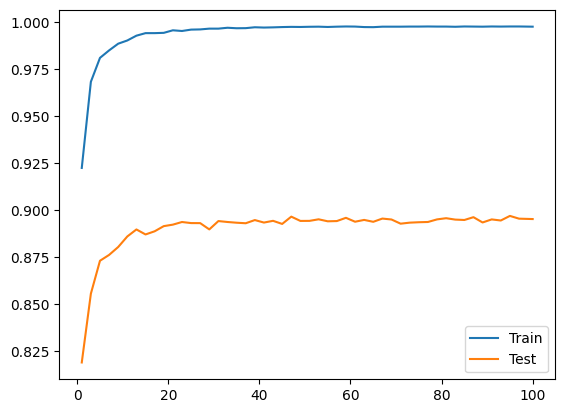

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np




param_values = np.linspace(1, 100, 50).astype(int)
train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=c)
    model.fit(x_train, y_train)

    # eval on train
    y_pred_train = model.predict(x_train)
    train_f1_score = f1_score(y_train, y_pred_train)
    train_scores.append(train_f1_score)

    # eval on test
    y_pred = model.predict(x_test)
    test_f1_score = f1_score(y_test, y_pred)
    test_scores.append(test_f1_score)

    print('param value: ' + str(c) + '; train f1_score: ' + str(train_f1_score) + '; test f1_score: ' + str(test_f1_score))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

# Feature Importance

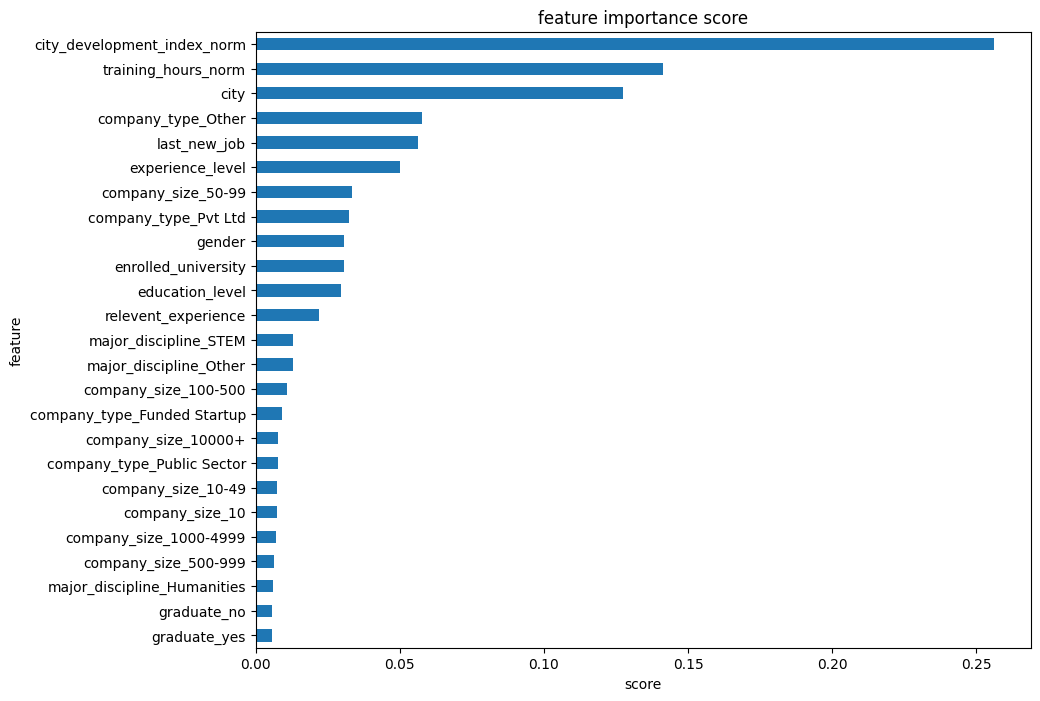

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)